<a href="https://colab.research.google.com/github/Gwgoulain/Process_Mining/blob/main/PROCESS_MINING_BPI_CHALLENGE_2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install & Imports
!apt-get -qq install -y graphviz && pip install pydot
!pip install cupy-cuda11x
!pip install pm4py
import pydot
import cupy
import pm4py
import pandas as pd
import os

/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:540: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime version

In [2]:
# Create the event log
# Dataset provided by van Dongen, B.F. (2012). BPI Challenge 2012 (Version 1) [Data set].
#Eindhoven University of Technology.
#https://doi.org/10.4121/uuid:3926db30-f712-4394-aebc-75976070e91f

if __name__ == "__main__":
    event_log = pm4py.read_xes('/content/BPI_Challenge_2012.xes')

# Print the event log
print(event_log)

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

       org:resource lifecycle:transition            concept:name  \
0               112             COMPLETE             A_SUBMITTED   
1               112             COMPLETE       A_PARTLYSUBMITTED   
2               112             COMPLETE           A_PREACCEPTED   
3               112             SCHEDULE  W_Completeren aanvraag   
4               NaN                START  W_Completeren aanvraag   
...             ...                  ...                     ...   
262195          112             COMPLETE       A_PARTLYSUBMITTED   
262196          112             SCHEDULE      W_Afhandelen leads   
262197        11169                START      W_Afhandelen leads   
262198        11169             COMPLETE              A_DECLINED   
262199        11169             COMPLETE      W_Afhandelen leads   

                time:timestamp           case:REG_DATE case:concept:name  \
0      2011-10-01 00:38:44.546 2011-10-01 00:38:44.546            173688   
1      2011-10-01 00:38:44.880 

In [3]:
# Convert the event log to a pandas DataFrame for easier handling
df = pm4py.convert_to_dataframe(event_log)

# Display the DataFrame structure to verify the data
print("Event Log DataFrame:")
print(df.head())

# Find distinct values in 'concept:name' and 'lifecycle:transition'
distinct_concept_names = sorted(df["concept:name"].unique())
distinct_lifecycle_transitions = sorted(df["lifecycle:transition"].unique())

# Print the distinct values for 'concept:name'
print("\nDistinct values in 'concept:name':")
for value in distinct_concept_names:
  print(value)

# Print the distinct values for 'lifecycle:transition'
print("\nDistinct values in 'lifecycle:transition':")
for value in distinct_lifecycle_transitions:
  print(value)

# Group by 'concept:name' and aggregate unique values of 'lifecycle:transition'
print("\nDistinct values in 'concept:name' with their values in 'lifecycle:transition':")
lifecycle_values_per_concept = df.groupby('concept:name')['lifecycle:transition'].unique().reset_index()

# Display the result
print(lifecycle_values_per_concept)

df

Event Log DataFrame:
  org:resource lifecycle:transition            concept:name  \
0          112             COMPLETE             A_SUBMITTED   
1          112             COMPLETE       A_PARTLYSUBMITTED   
2          112             COMPLETE           A_PREACCEPTED   
3          112             SCHEDULE  W_Completeren aanvraag   
4          NaN                START  W_Completeren aanvraag   

           time:timestamp           case:REG_DATE case:concept:name  \
0 2011-10-01 00:38:44.546 2011-10-01 00:38:44.546            173688   
1 2011-10-01 00:38:44.880 2011-10-01 00:38:44.546            173688   
2 2011-10-01 00:39:37.906 2011-10-01 00:38:44.546            173688   
3 2011-10-01 00:39:38.875 2011-10-01 00:38:44.546            173688   
4 2011-10-01 11:36:46.437 2011-10-01 00:38:44.546            173688   

  case:AMOUNT_REQ  
0           20000  
1           20000  
2           20000  
3           20000  
4           20000  

Distinct values in 'concept:name':
A_ACCEPTED
A_ACTI

org:resource lifecycle:transition            concept:name  \
0               112             COMPLETE             A_SUBMITTED   
1               112             COMPLETE       A_PARTLYSUBMITTED   
2               112             COMPLETE           A_PREACCEPTED   
3               112             SCHEDULE  W_Completeren aanvraag   
4               NaN                START  W_Completeren aanvraag   
...             ...                  ...                     ...   
262195          112             COMPLETE       A_PARTLYSUBMITTED   
262196          112             SCHEDULE      W_Afhandelen leads   
262197        11169                START      W_Afhandelen leads   
262198        11169             COMPLETE              A_DECLINED   
262199        11169             COMPLETE      W_Afhandelen leads   

                time:timestamp           case:REG_DATE case:concept:name  \
0      2011-10-01 00:38:44.546 2011-10-01 00:38:44.546            173688   
1      2011-10-01 00:38:44.880 2011-10-01 00:38:44.546            173688   
2      2011-10-01 00:39:37.906 2011-10-01 00:38:44.546            173688   
3      2011-10-01 00:39:38.875 2011-10-01 00:38:44.546            173688   
4      2011-10-01 11:36:46.437 2011-10-01 00:38:44.546            173688   
...                        ...                     ...               ...   
262195 2012-02-29 23:51:17.423 2012-02-29 23:51:16.799            214376   
262196 2012-02-29 23:52:01.287 2012-02-29 23:51:16.799            214376   
262197 2012-03-01 09:26:46.736 2012-02-29 23:51:16.799            214376   
262198 2012-03-01 09:27:37.118 2012-02-29 23:51:16.799            214376   
262199 2012-03-01 09:27:41.325 2012-02-29 23:51:16.799            214376   

       case:AMOUNT_REQ  
0                20000  
1                20000  
2                20000  
3                20000  
4                20000  
...                ...  
262195           15000  
262196           15000  
262197           15000  
262198           15000  
262199           15000  

[262200 rows x 7 columns]

In [4]:
# Ensure 'time:timestamp' is in datetime format
df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])

# Find the minimum and maximum timestamps
start_date = df["time:timestamp"].min()
end_date = df["time:timestamp"].max()

# Extract month and year
start_month_year = start_date.strftime("%B %Y")
end_month_year = end_date.strftime("%B %Y")

# Display the start and end month and year
print(f"Data start month and year: {start_month_year}")
print(f"Data end month and year: {end_month_year}")

Data start month and year: October 2011
Data end month and year: March 2012


In [5]:
# Count the start & end activities from the log
event_log_start = pm4py.stats.get_start_activities(event_log)
event_log_end = pm4py.stats.get_end_activities(event_log)

print(f"Start activities: {event_log_start}")
print(f"End activities: {event_log_end}")

Start activities: {'A_SUBMITTED': 13087}
End activities: {'W_Valideren aanvraag': 2747, 'W_Wijzigen contractgegevens': 4, 'A_DECLINED': 3429, 'W_Completeren aanvraag': 1939, 'A_CANCELLED': 655, 'W_Nabellen incomplete dossiers': 452, 'W_Afhandelen leads': 2234, 'W_Nabellen offertes': 1290, 'W_Beoordelen fraude': 57, 'O_CANCELLED': 279, 'A_REGISTERED': 1}


In [6]:
# DIFFERENCE BETWEEN A_ACTIVATED,A_APPROVED,A_REGISTERED
# Calculate the number of unique cases in new_df with each specific activity and 'COMPLETE' transition
activated_complete_count = df[(df['concept:name'] == 'A_ACTIVATED') & (df['lifecycle:transition'] == 'COMPLETE')]['case:concept:name'].nunique()
approved_complete_count = df[(df['concept:name'] == 'A_APPROVED') & (df['lifecycle:transition'] == 'COMPLETE')]['case:concept:name'].nunique()
registered_complete_count = df[(df['concept:name'] == 'A_REGISTERED') & (df['lifecycle:transition'] == 'COMPLETE')]['case:concept:name'].nunique()

# Display the counts
print(f"Number of cases with A_ACTIVATED and COMPLETE: {activated_complete_count}")
print(f"Number of cases with A_APPROVED and COMPLETE: {approved_complete_count}")
print(f"Number of cases with A_REGISTERED and COMPLETE: {registered_complete_count}")

Number of cases with A_ACTIVATED and COMPLETE: 2246
Number of cases with A_APPROVED and COMPLETE: 2246
Number of cases with A_REGISTERED and COMPLETE: 2246


In [7]:
# Filter for rows that include only relevant transitions
relevant_events_df = df[df['concept:name'].isin(['A_SUBMITTED', 'A_REGISTERED', 'A_DECLINED', 'A_CANCELLED']) &
                        (df['lifecycle:transition'] == 'COMPLETE')]

# Identify cases that have "A_REGISTERED COMPLETE", "A_DECLINED COMPLETE", or "A_CANCELLED COMPLETE"
cases_with_action = relevant_events_df[relevant_events_df['concept:name'].isin(['A_REGISTERED', 'A_DECLINED', 'A_CANCELLED'])]['case:concept:name'].unique()

# Identify cases that have "A_SUBMITTED COMPLETE"
cases_with_submitted = relevant_events_df[relevant_events_df['concept:name'] == 'A_SUBMITTED']['case:concept:name'].unique()

# Find cases that have an action (activated, declined, or cancelled) without having submitted
cases_without_submitted = set(cases_with_action) - set(cases_with_submitted)

# Display the results
print("Cases that have 'A_REGISTERED COMPLETE', 'A_DECLINED COMPLETE', or 'A_CANCELLED COMPLETE' without 'A_SUBMITTED COMPLETE':")
print(cases_without_submitted)
print('------------------------------------------------------------')

Cases that have 'A_REGISTERED COMPLETE', 'A_DECLINED COMPLETE', or 'A_CANCELLED COMPLETE' without 'A_SUBMITTED COMPLETE':
set()
------------------------------------------------------------


In [8]:
# Events that are required for a application to be complete
required_events = ["A_DECLINED", "A_REGISTERED", "A_CANCELLED"]

# Identify cases that have any of the required events marked as COMPLETE
complete_cases = df[
    (df['lifecycle:transition'] == "COMPLETE") &
    (df['concept:name'].isin(required_events))
]['case:concept:name'].unique()

# Filter the DataFrame to keep only the rows belonging to complete cases
new_df = df[df['case:concept:name'].isin(complete_cases)]

# Display the New DataFrame
new_df

org:resource lifecycle:transition            concept:name  \
0               112             COMPLETE             A_SUBMITTED   
1               112             COMPLETE       A_PARTLYSUBMITTED   
2               112             COMPLETE           A_PREACCEPTED   
3               112             SCHEDULE  W_Completeren aanvraag   
4               NaN                START  W_Completeren aanvraag   
...             ...                  ...                     ...   
262195          112             COMPLETE       A_PARTLYSUBMITTED   
262196          112             SCHEDULE      W_Afhandelen leads   
262197        11169                START      W_Afhandelen leads   
262198        11169             COMPLETE              A_DECLINED   
262199        11169             COMPLETE      W_Afhandelen leads   

                time:timestamp           case:REG_DATE case:concept:name  \
0      2011-10-01 00:38:44.546 2011-10-01 00:38:44.546            173688   
1      2011-10-01 00:38:44.880 2011-10-01 00:38:44.546            173688   
2      2011-10-01 00:39:37.906 2011-10-01 00:38:44.546            173688   
3      2011-10-01 00:39:38.875 2011-10-01 00:38:44.546            173688   
4      2011-10-01 11:36:46.437 2011-10-01 00:38:44.546            173688   
...                        ...                     ...               ...   
262195 2012-02-29 23:51:17.423 2012-02-29 23:51:16.799            214376   
262196 2012-02-29 23:52:01.287 2012-02-29 23:51:16.799            214376   
262197 2012-03-01 09:26:46.736 2012-02-29 23:51:16.799            214376   
262198 2012-03-01 09:27:37.118 2012-02-29 23:51:16.799            214376   
262199 2012-03-01 09:27:41.325 2012-02-29 23:51:16.799            214376   

       case:AMOUNT_REQ  
0                20000  
1                20000  
2                20000  
3                20000  
4                20000  
...                ...  
262195           15000  
262196           15000  
262197           15000  
262198           15000  
262199           15000  

[249451 rows x 7 columns]

In [9]:
# Count the occurrences of each complete event type in the first df
submitted_complete_count = df[(df['concept:name'] == 'A_SUBMITTED') & (df['lifecycle:transition'] == 'COMPLETE')].shape[0]
partlysubmitted_complete_count = df[(df['concept:name'] == 'A_PARTLYSUBMITTED') & (df['lifecycle:transition'] == 'COMPLETE')].shape[0]
declined_complete_count = df[(df['concept:name'] == 'A_DECLINED') & (df['lifecycle:transition'] == 'COMPLETE')].shape[0]
cancelled_complete_count = df[(df['concept:name'] == 'A_CANCELLED') & (df['lifecycle:transition'] == 'COMPLETE')].shape[0]
registered_complete_count = df[(df['concept:name'] == 'A_REGISTERED') & (df['lifecycle:transition'] == 'COMPLETE')].shape[0]

# Print the counts
print(f"Number of A_SUBMITTED COMPLETE: {submitted_complete_count}")
print(f"Number of A_PARTLYSUBMITTED COMPLETE: {partlysubmitted_complete_count}")
print(f"Number of A_DECLINED COMPLETE: {declined_complete_count}")
print(f"Number of A_CANCELLED COMPLETE: {cancelled_complete_count}")
print(f"Number of A_REGISTERED COMPLETE: {registered_complete_count}")
print('------------------------------------------------------------')

# Count the occurrences of each complete event type in the new df
new_submitted_complete_count = new_df[(new_df['concept:name'] == 'A_SUBMITTED') & (new_df['lifecycle:transition'] == 'COMPLETE')].shape[0]
new_partlysubmitted_complete_count = new_df[(new_df['concept:name'] == 'A_PARTLYSUBMITTED') & (new_df['lifecycle:transition'] == 'COMPLETE')].shape[0]
new_declined_complete_count = new_df[(new_df['concept:name'] == 'A_DECLINED') & (new_df['lifecycle:transition'] == 'COMPLETE')].shape[0]
new_cancelled_complete_count = new_df[(new_df['concept:name'] == 'A_CANCELLED') & (new_df['lifecycle:transition'] == 'COMPLETE')].shape[0]
new_registered_complete_count = new_df[(new_df['concept:name'] == 'A_REGISTERED') & (new_df['lifecycle:transition'] == 'COMPLETE')].shape[0]

# Print the counts
print(f"Number of NEW A_SUBMITTED COMPLETE: {new_submitted_complete_count}")
print(f"Number of NEW A_PARTLYSUBMITTED COMPLETE: {new_partlysubmitted_complete_count}")
print(f"Number of NEW A_DECLINED COMPLETE: {new_declined_complete_count}")
print(f"Number of NEW A_CANCELLED COMPLETE: {new_cancelled_complete_count}")
print(f"Number of NEW A_REGISTERED COMPLETE: {new_registered_complete_count}")
print('------------------------------------------------------------')

# No of cases that are not completed in the dataset
num_cases =df['case:concept:name'].nunique()
new_num_cases = new_df['case:concept:name'].nunique()
difference = num_cases - new_num_cases

print(f"Number of unique cases in df: {num_cases}")
print(f"Number of unique cases in new_df: {new_num_cases}")
print(f"Number of cases that are not completed: {difference}")

Number of A_SUBMITTED COMPLETE: 13087
Number of A_PARTLYSUBMITTED COMPLETE: 13087
Number of A_DECLINED COMPLETE: 7635
Number of A_CANCELLED COMPLETE: 2807
Number of A_REGISTERED COMPLETE: 2246
------------------------------------------------------------
Number of NEW A_SUBMITTED COMPLETE: 12688
Number of NEW A_PARTLYSUBMITTED COMPLETE: 12688
Number of NEW A_DECLINED COMPLETE: 7635
Number of NEW A_CANCELLED COMPLETE: 2807
Number of NEW A_REGISTERED COMPLETE: 2246
------------------------------------------------------------
Number of unique cases in df: 13087
Number of unique cases in new_df: 12688
Number of cases that are not completed: 399


In [10]:
# Convert the NEW DataFrame to an event log for pm4py
new_event_log = pm4py.convert_to_event_log(new_df)

# Export the NEW event log to an XES file
pm4py.write_xes(new_event_log, "/content/new_event_log.xes")

exporting log, completed traces ::   0%|          | 0/12688 [00:00<?, ?it/s]

In [11]:
# Find the start & end activities from the new df
new_event_log_start = pm4py.stats.get_start_activities(new_event_log)
new_event_log_end = pm4py.stats.get_end_activities(new_event_log)

print(f"Start activities: {new_event_log_start}")
print(f"End activities: {new_event_log_end}")

Start activities: {'A_SUBMITTED': 12688}
End activities: {'W_Valideren aanvraag': 2740, 'W_Wijzigen contractgegevens': 4, 'A_DECLINED': 3429, 'W_Completeren aanvraag': 1863, 'A_CANCELLED': 655, 'W_Nabellen incomplete dossiers': 407, 'W_Afhandelen leads': 2234, 'W_Nabellen offertes': 1019, 'W_Beoordelen fraude': 57, 'O_CANCELLED': 279, 'A_REGISTERED': 1}


In [12]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
new_df2 = new_df.copy()

# Rename columns for pm4py compatibility if needed
new_df2.rename(columns={
    'case:concept:name': 'case_id',
    'concept:name': 'activity',
    'lifecycle:transition': 'transition',
    'time:timestamp': 'timestamp'
}, inplace=True)

# Display the modified DataFrame
new_df2

org:resource transition                activity  \
0               112   COMPLETE             A_SUBMITTED   
1               112   COMPLETE       A_PARTLYSUBMITTED   
2               112   COMPLETE           A_PREACCEPTED   
3               112   SCHEDULE  W_Completeren aanvraag   
4               NaN      START  W_Completeren aanvraag   
...             ...        ...                     ...   
262195          112   COMPLETE       A_PARTLYSUBMITTED   
262196          112   SCHEDULE      W_Afhandelen leads   
262197        11169      START      W_Afhandelen leads   
262198        11169   COMPLETE              A_DECLINED   
262199        11169   COMPLETE      W_Afhandelen leads   

                     timestamp           case:REG_DATE case_id case:AMOUNT_REQ  
0      2011-10-01 00:38:44.546 2011-10-01 00:38:44.546  173688           20000  
1      2011-10-01 00:38:44.880 2011-10-01 00:38:44.546  173688           20000  
2      2011-10-01 00:39:37.906 2011-10-01 00:38:44.546  173688           20000  
3      2011-10-01 00:39:38.875 2011-10-01 00:38:44.546  173688           20000  
4      2011-10-01 11:36:46.437 2011-10-01 00:38:44.546  173688           20000  
...                        ...                     ...     ...             ...  
262195 2012-02-29 23:51:17.423 2012-02-29 23:51:16.799  214376           15000  
262196 2012-02-29 23:52:01.287 2012-02-29 23:51:16.799  214376           15000  
262197 2012-03-01 09:26:46.736 2012-02-29 23:51:16.799  214376           15000  
262198 2012-03-01 09:27:37.118 2012-02-29 23:51:16.799  214376           15000  
262199 2012-03-01 09:27:41.325 2012-02-29 23:51:16.799  214376           15000  

[249451 rows x 7 columns]

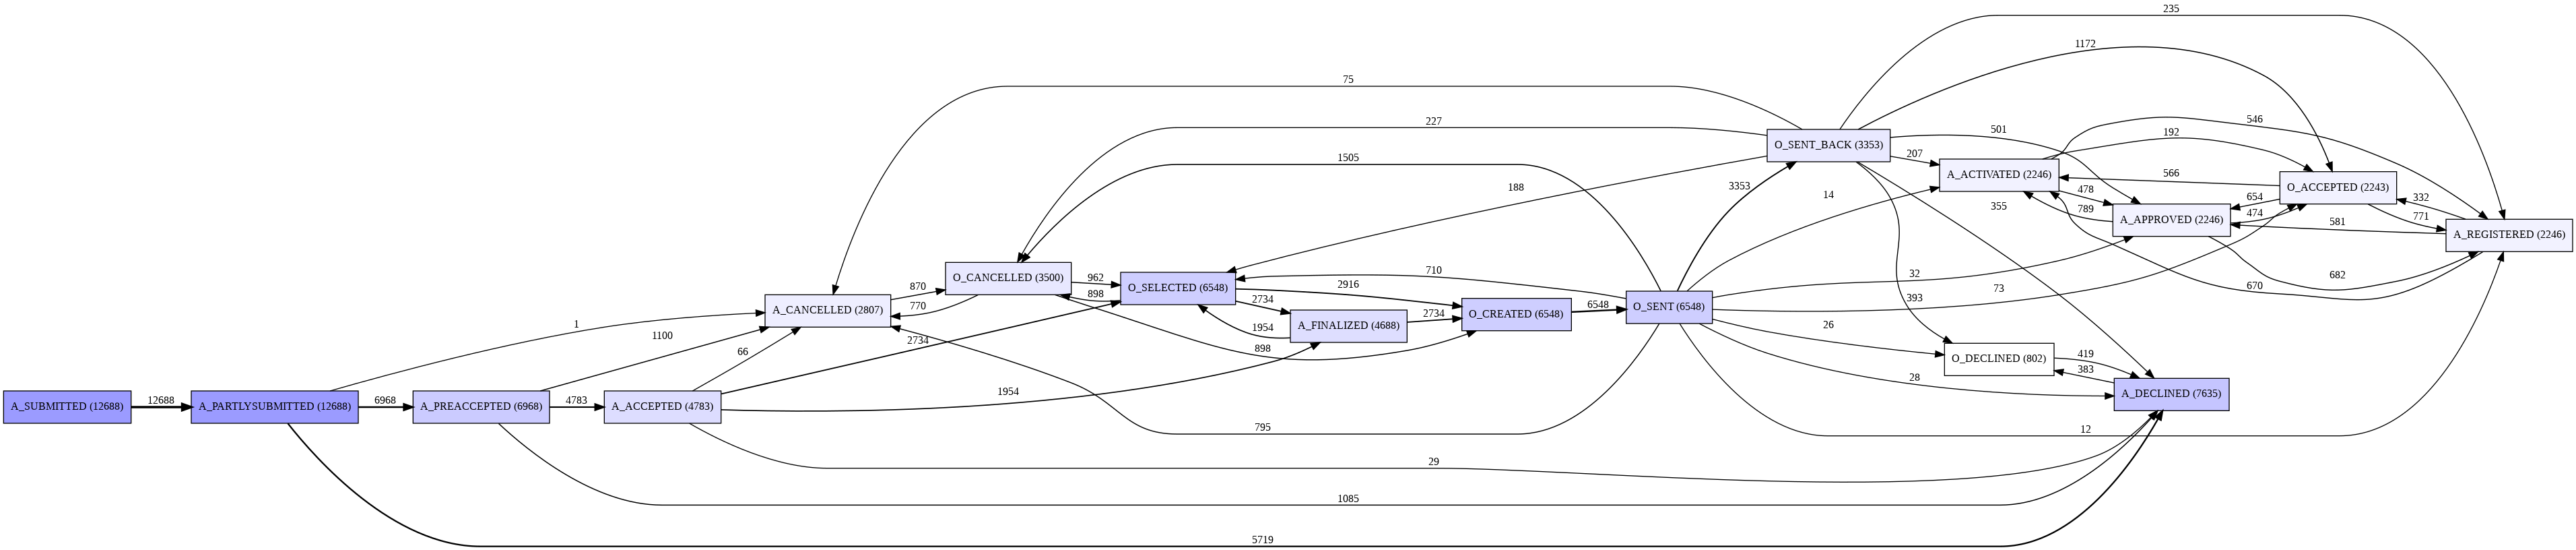

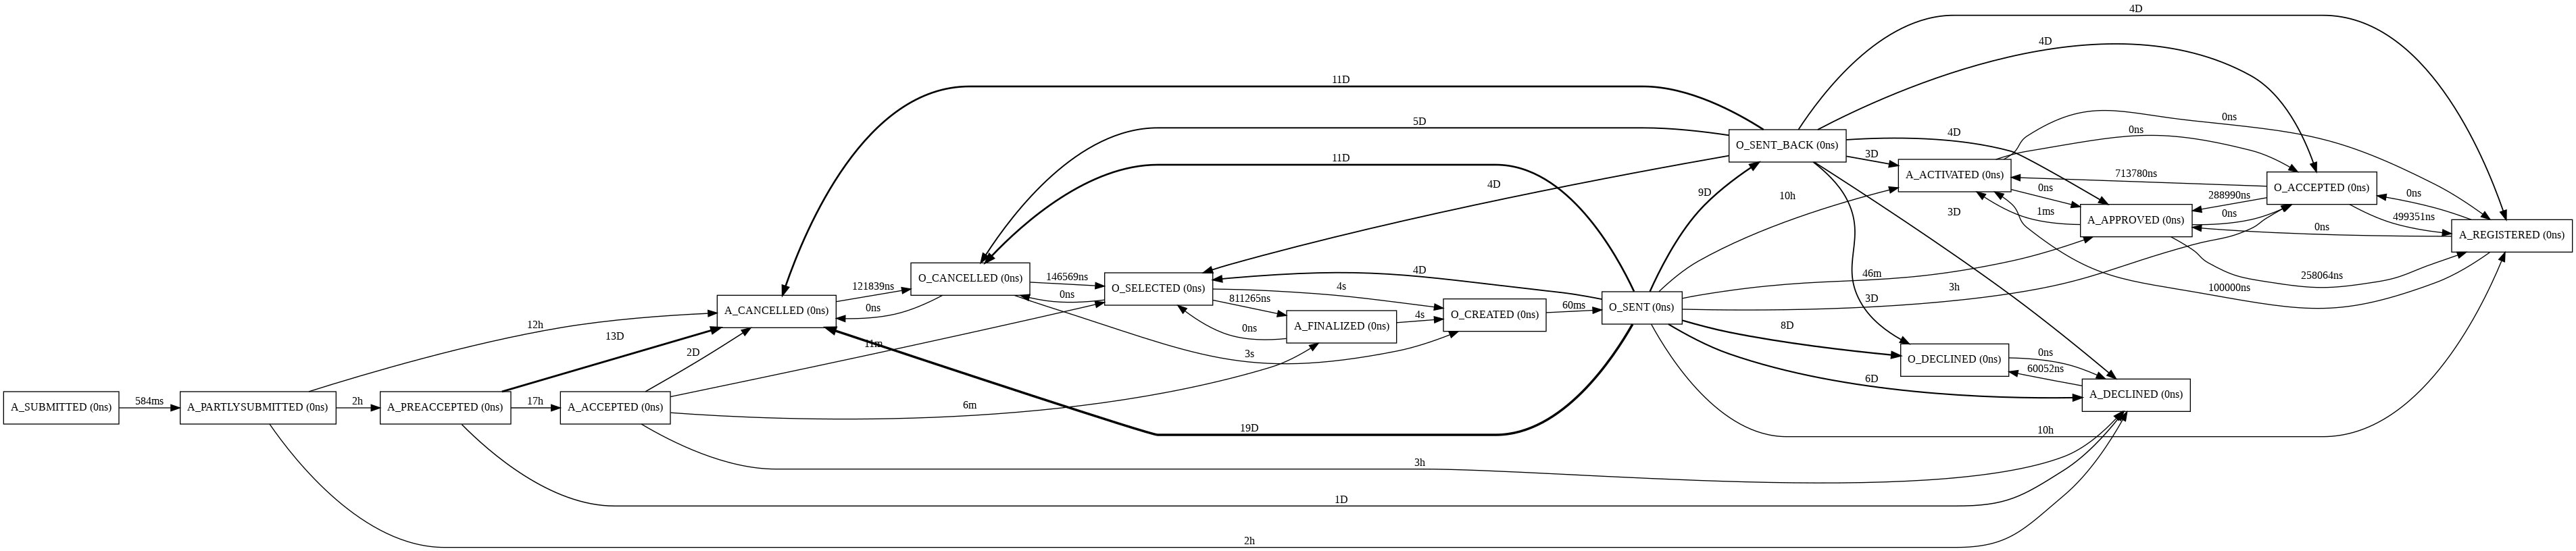

In [13]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
new_df_dfg = new_df2.copy()

# Create a new Dataframe excluding the activities W_
new_df_dfg_w_out = new_df_dfg[~new_df_dfg['activity'].str.startswith("W_")]
new_df_dfg_w_out = new_df_dfg_w_out.copy()

# Format DataFrame for pm4py compatibility
formatted_new_df_dfg_w_out = pm4py.format_dataframe(
    new_df_dfg_w_out,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp"
)

# Convert to an event log
event_log_dfg_w_out = pm4py.convert_to_event_log(formatted_new_df_dfg_w_out)

# Discover the Directly-Follows Graph (DFG)
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(event_log_dfg_w_out)

# Visualize the DFG (Process Map)
from pm4py.visualization.dfg import visualizer as dfg_visualizer
gviz_dfg_w_out = dfg_visualizer.apply(dfg, log=event_log_dfg_w_out)
dfg_visualizer.view(gviz_dfg_w_out)

# Discover the DFG with performance information
dfg_perf = dfg_discovery.apply(event_log_dfg_w_out, variant=dfg_discovery.Variants.PERFORMANCE)

# Visualize the DFG with performance information
gviz_dfg_perf = dfg_visualizer.apply(dfg_perf, log=event_log_dfg_w_out, variant=dfg_visualizer.Variants.PERFORMANCE)
dfg_visualizer.view(gviz_dfg_perf)

In [14]:
# Find the start & end activities in the log that W_ activities are excluded
event_log_start_w_out = pm4py.stats.get_start_activities(event_log_dfg_w_out)
event_log_end_w_out = pm4py.stats.get_end_activities(event_log_dfg_w_out)

print(f"Start activities: {event_log_start_w_out}")
print(f"End activities: {event_log_end_w_out}")

Start activities: {'A_SUBMITTED': 12688}
End activities: {'A_ACTIVATED': 1030, 'A_DECLINED': 7252, 'A_CANCELLED': 1937, 'O_DECLINED': 383, 'A_APPROVED': 301, 'O_ACCEPTED': 252, 'A_REGISTERED': 663, 'O_CANCELLED': 870}


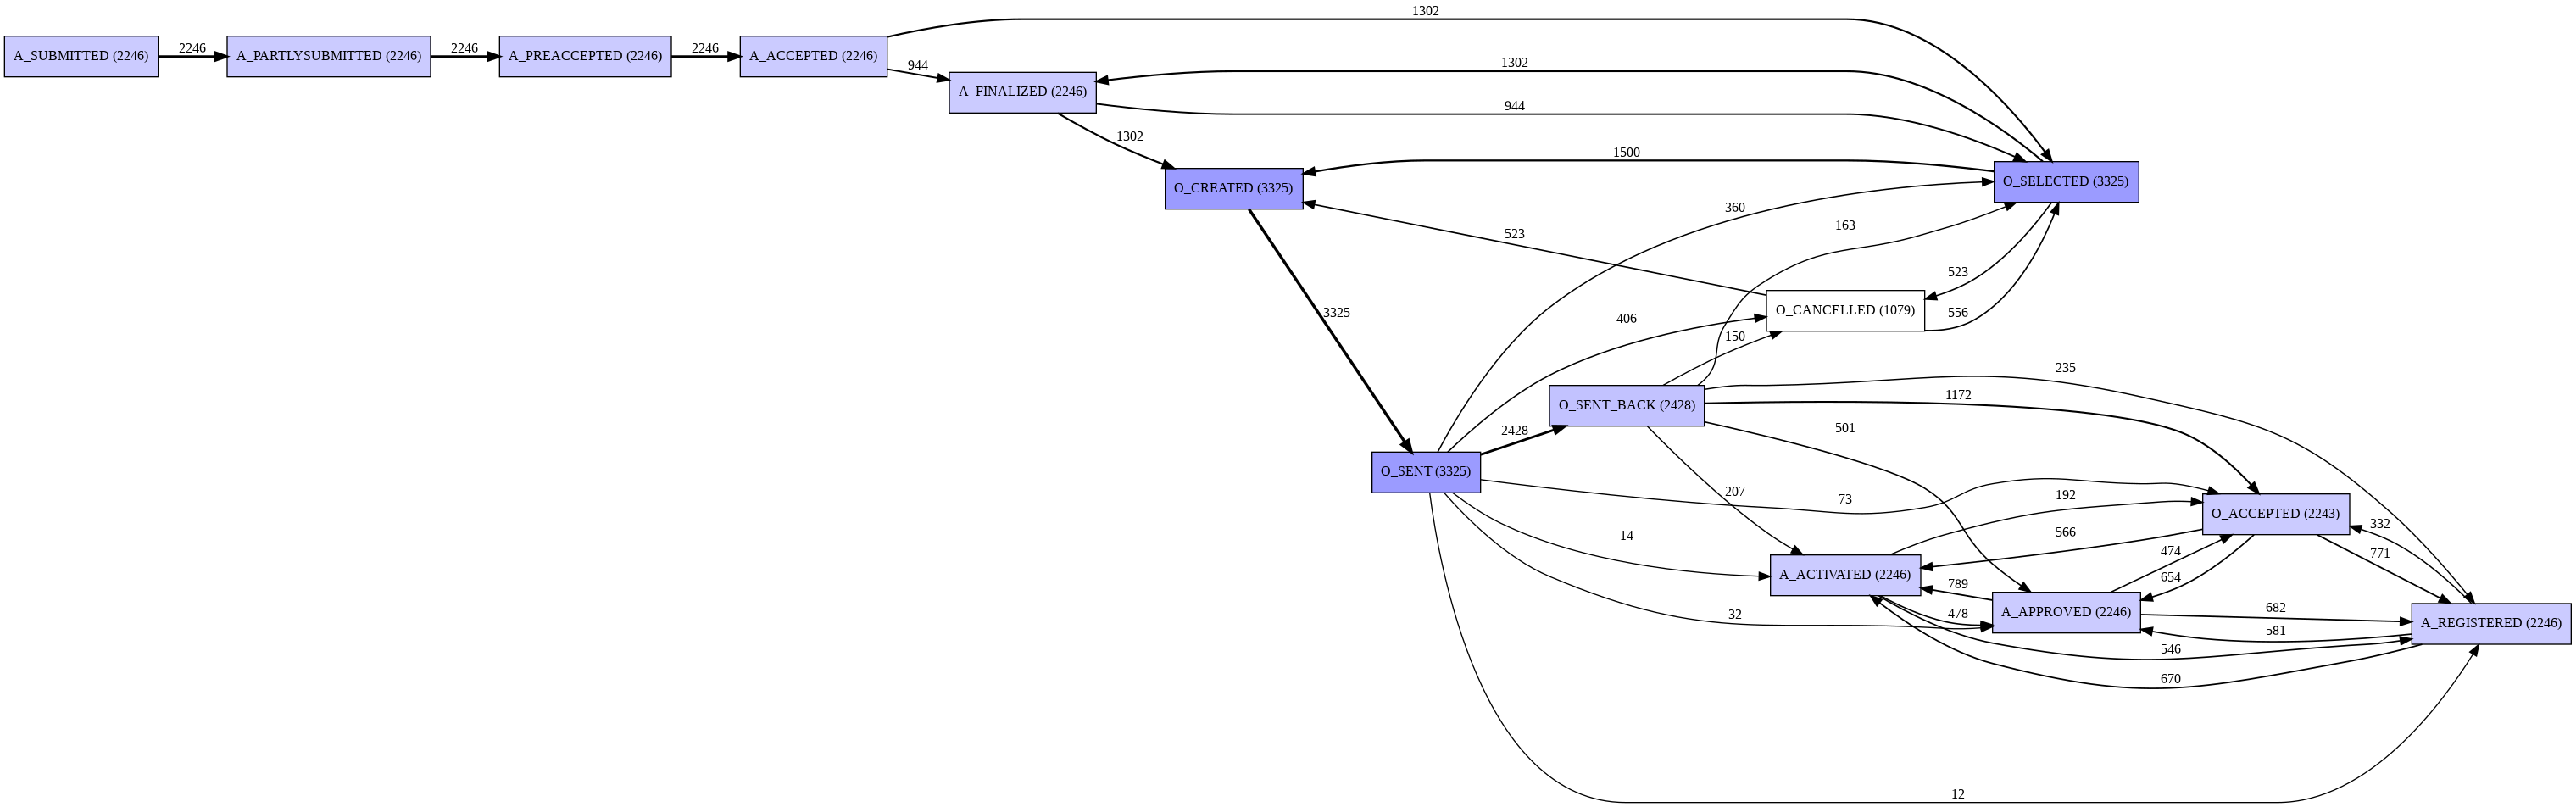

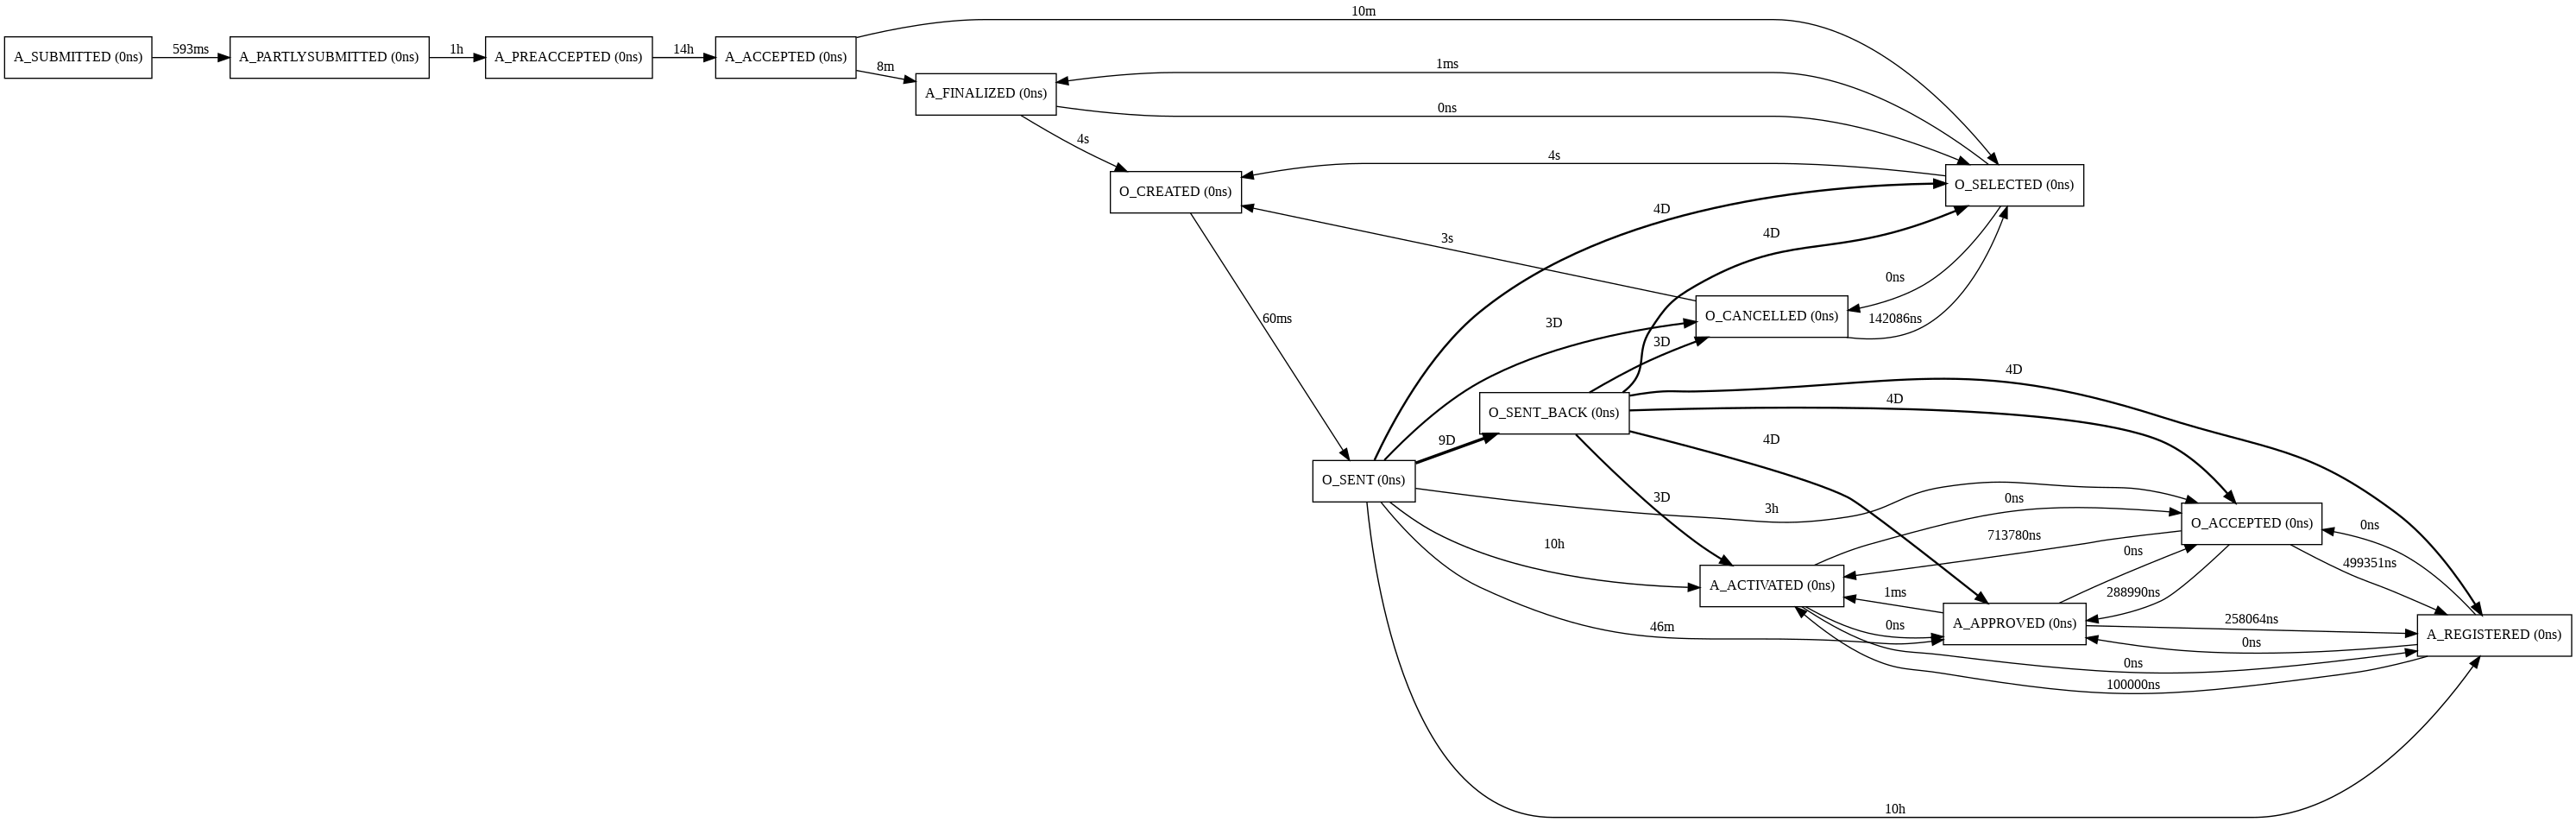

In [15]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
new_df_dfg = new_df2.copy()

# Filter out all activities that start with "W_"
new_df_dfg_w_out = new_df_dfg[~new_df_dfg['activity'].str.startswith("W_")]
new_df_dfg_w_out = new_df_dfg_w_out.copy()

# HAPPY PATH=Filter for cases that reach 'A_REGISTERED' with 'COMPLETE' transition to isolate successful applications
registered_cases_w_out = new_df_dfg_w_out[(new_df_dfg_w_out['activity'] == 'A_REGISTERED') & (new_df_dfg_w_out['transition'] == 'COMPLETE')]['case_id'].unique()
happy_new_df_dfg_w_out = new_df_dfg_w_out[new_df_dfg_w_out['case_id'].isin(registered_cases_w_out)].copy()

# Format DataFrame for pm4py compatibility
formatted_happy_new_df_dfg_w_out = pm4py.format_dataframe(
    happy_new_df_dfg_w_out,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp"
)

# Convert to an event log
event_log_happy_new_df_dfg_w_out = pm4py.convert_to_event_log(formatted_happy_new_df_dfg_w_out)

# Discover the Directly-Follows Graph (DFG)
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
happy_dfg = dfg_discovery.apply(event_log_happy_new_df_dfg_w_out)

# Visualize the DFG (Process Map)
from pm4py.visualization.dfg import visualizer as dfg_visualizer
gviz_happy_dfg_w_out = dfg_visualizer.apply(happy_dfg, log=event_log_happy_new_df_dfg_w_out)
dfg_visualizer.view(gviz_happy_dfg_w_out)

# Discover the DFG with performance information
happy_dfg_perf = dfg_discovery.apply(event_log_happy_new_df_dfg_w_out, variant=dfg_discovery.Variants.PERFORMANCE)

# Visualize the DFG with performance information
gviz_happy_dfg_perf = dfg_visualizer.apply(happy_dfg_perf, log=event_log_happy_new_df_dfg_w_out, variant=dfg_visualizer.Variants.PERFORMANCE)
dfg_visualizer.view(gviz_happy_dfg_perf)

In [16]:
# Find the start & end activities from the happy path
event_log_happy_start_w_out = pm4py.stats.get_start_activities(event_log_happy_new_df_dfg_w_out)
event_log_happy_end_w_out = pm4py.stats.get_end_activities(event_log_happy_new_df_dfg_w_out)

print(f"Start activities: {event_log_happy_start_w_out}")
print(f"End activities: {event_log_happy_end_w_out}")

Start activities: {'A_SUBMITTED': 2246}
End activities: {'A_ACTIVATED': 1030, 'A_APPROVED': 301, 'O_ACCEPTED': 252, 'A_REGISTERED': 663}


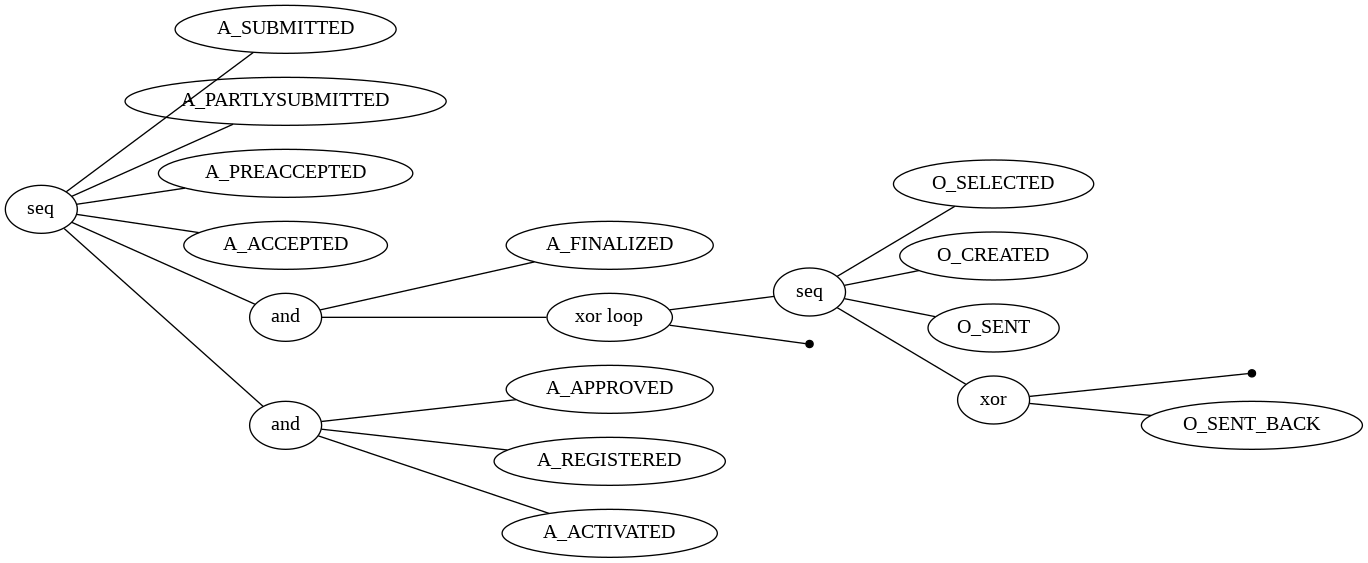

In [17]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
tree_w_out = new_df2.copy()

# Filter out all activities that start with "W_"
tree_w_out = tree_w_out[~tree_w_out['activity'].str.startswith("W_")]
tree_w_out = tree_w_out[~tree_w_out['activity'].isin(['O_CANCELLED', 'O_ACCEPTED'])]

# HAPPY PATH=Filter for cases that reach 'A_REGISTERED' with 'COMPLETE' transition to isolate successful applications
registered_cases_w_out = tree_w_out[(tree_w_out['activity'] == 'A_REGISTERED') & (tree_w_out['transition'] == 'COMPLETE')]['case_id'].unique()
happy_tree_w_out = tree_w_out[tree_w_out['case_id'].isin(registered_cases_w_out)].copy()

# Format DataFrame for pm4py compatibility
formatted_happy_tree_w_out = pm4py.format_dataframe(
    happy_tree_w_out,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp",
)
# Convert the formatted DataFrame to an event log
new_event_log_tree_w_out = pm4py.convert_to_event_log(formatted_happy_tree_w_out)

happy_path_process_tree = pm4py.discovery.discover_process_tree_inductive(new_event_log_tree_w_out)

from pm4py.visualization.process_tree import visualizer as pt_visualizer

# Visualize the Process Tree (happy path)
gviz_happy_tree = pt_visualizer.apply(happy_path_process_tree)
pt_visualizer.view(gviz_happy_tree)

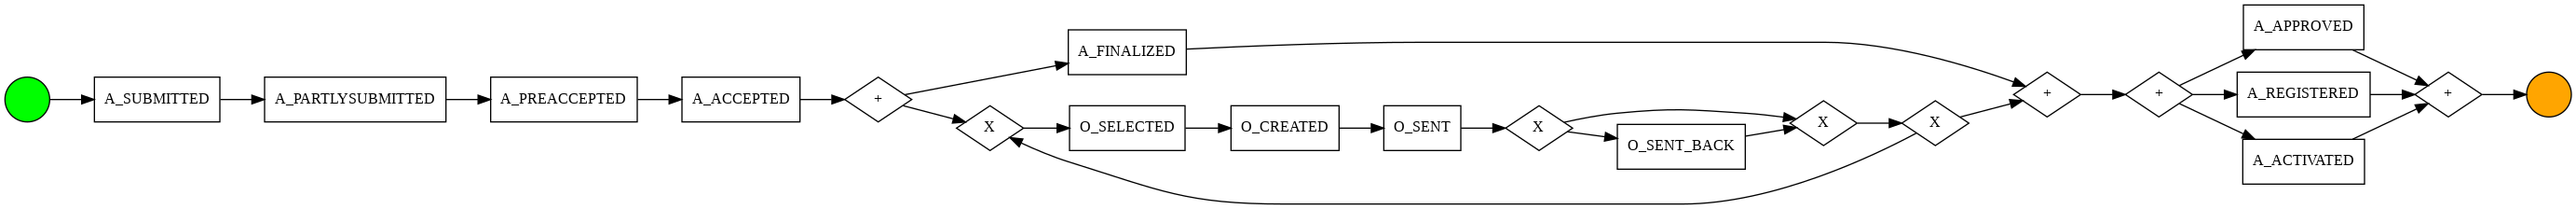

In [18]:
# Convert the Process Tree to a BPMN model
from pm4py.objects.conversion.process_tree import converter as pt_converter
bpmn_model_happy = pt_converter.apply(happy_path_process_tree, variant=pt_converter.Variants.TO_BPMN)

# Visualize the BPMN model (happy path)
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
gviz_bpmn_happy = bpmn_visualizer.apply(bpmn_model_happy)
bpmn_visualizer.view(gviz_bpmn_happy)

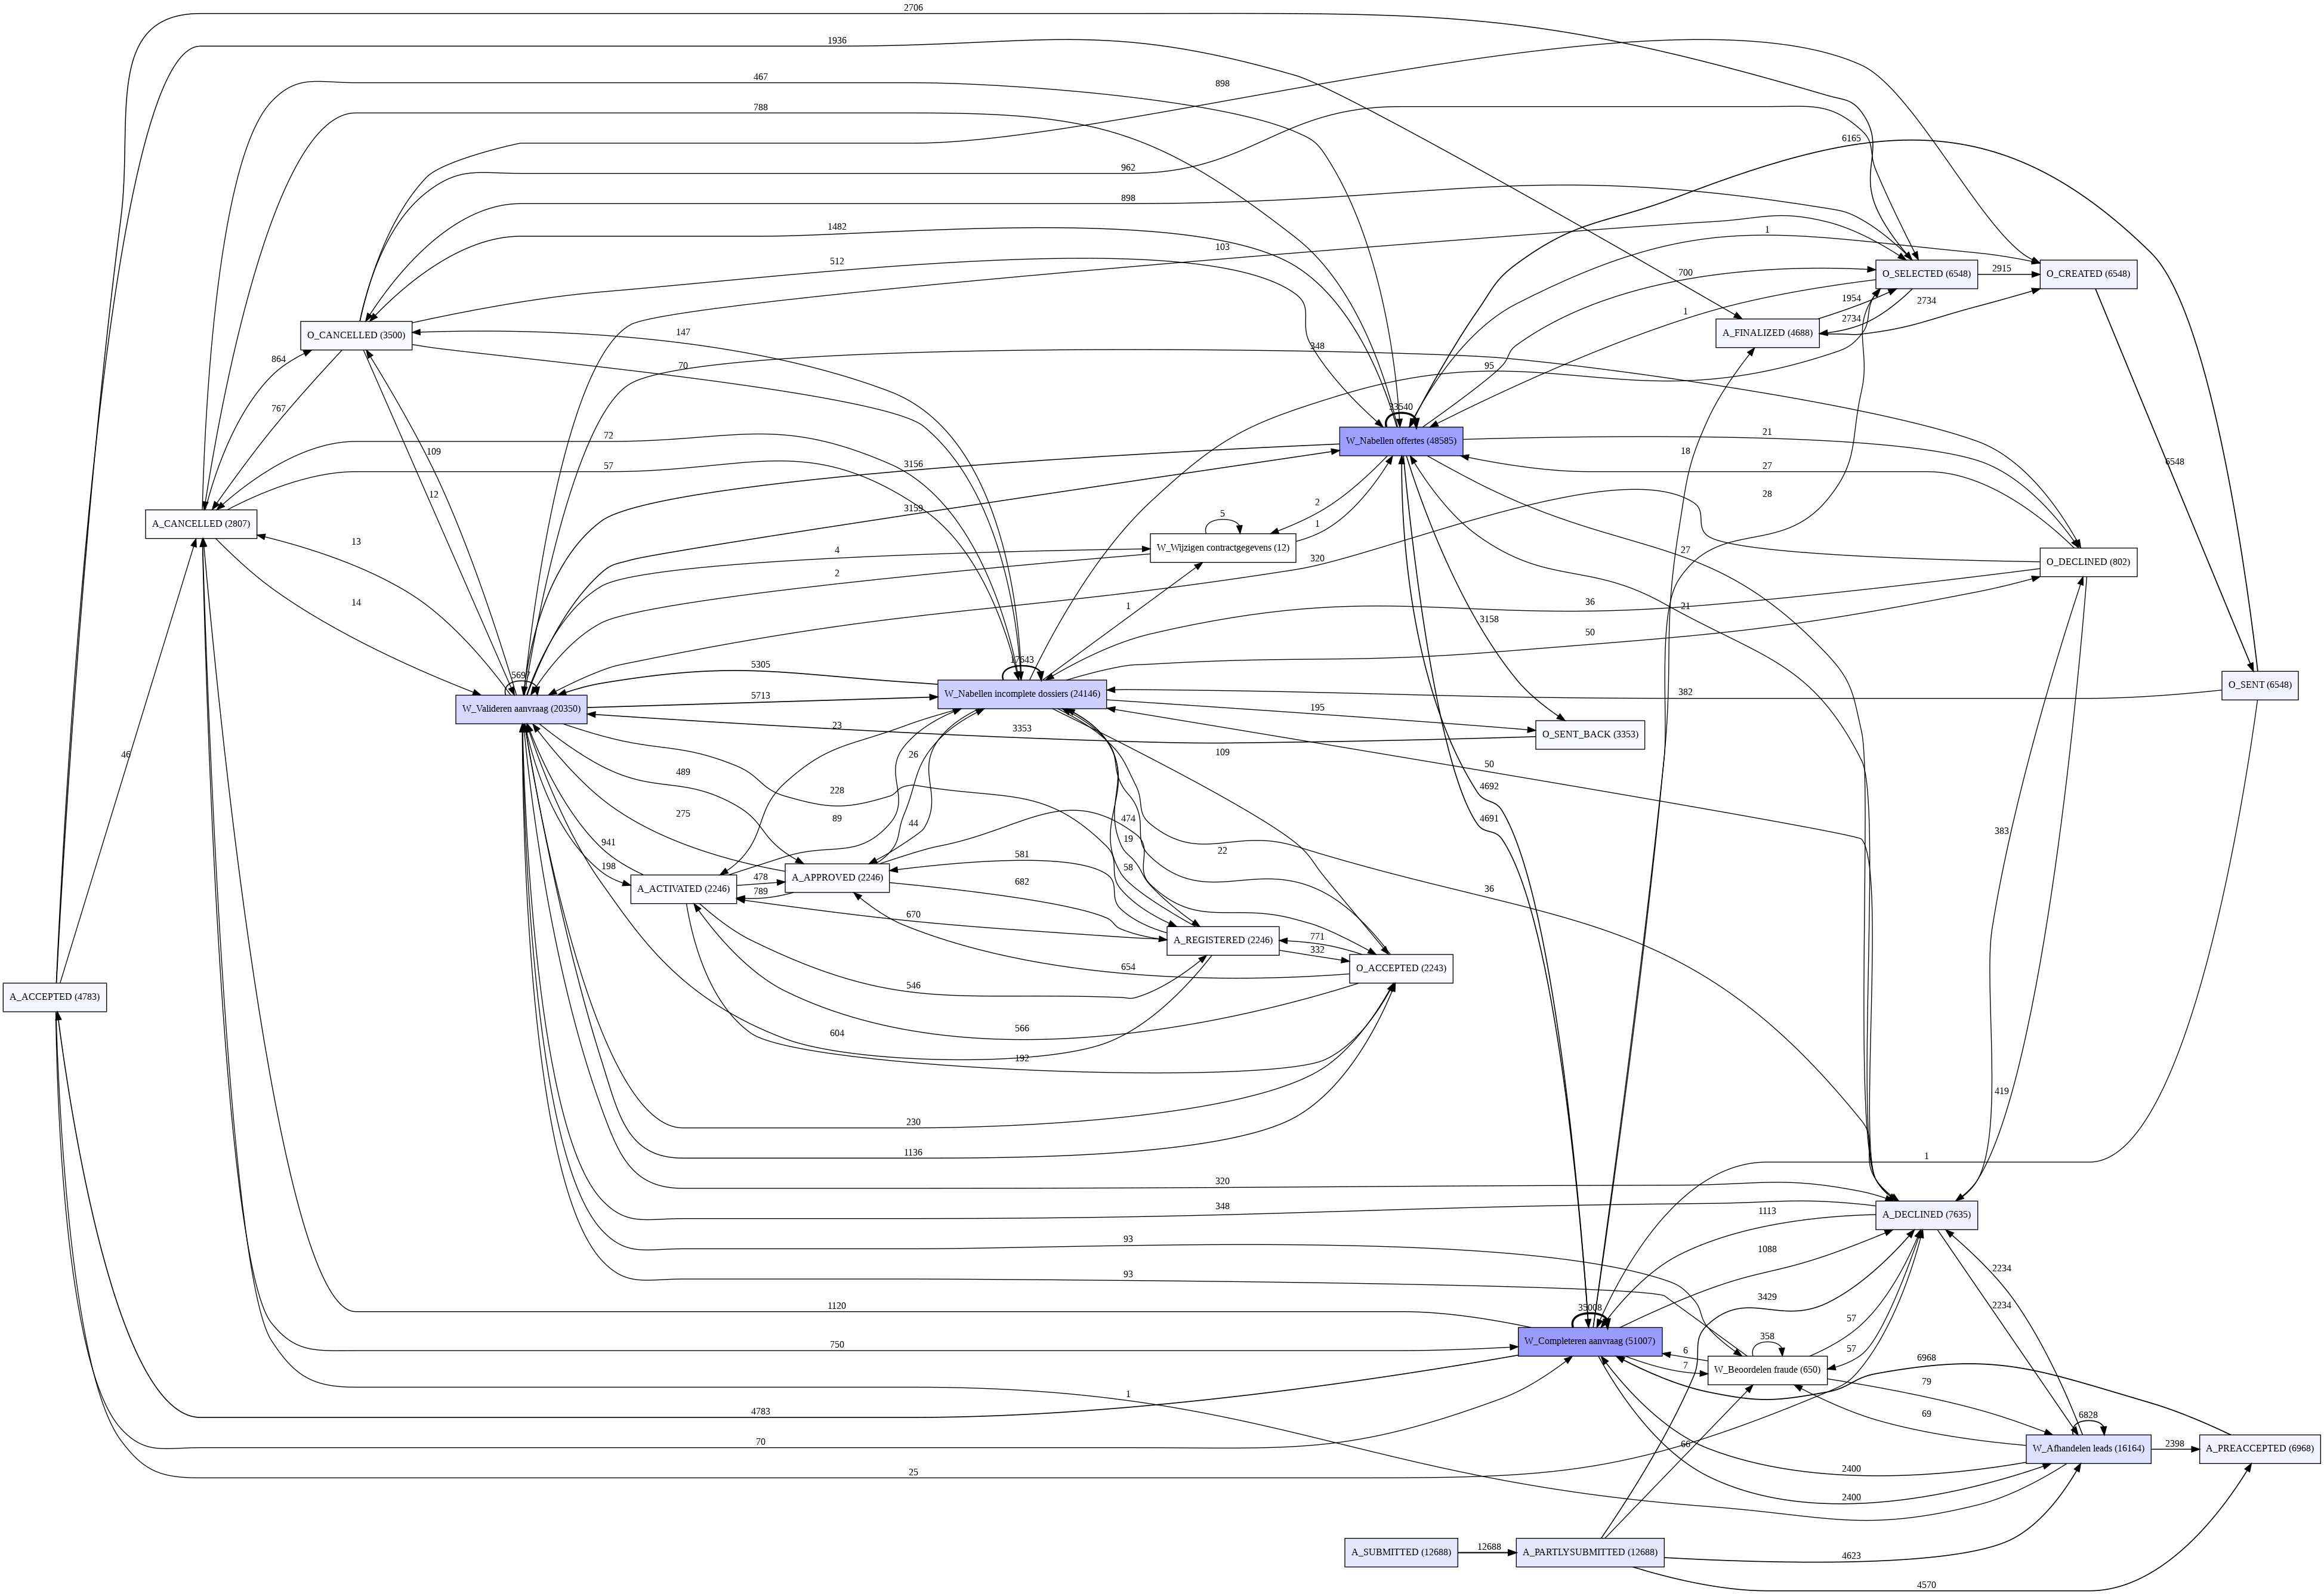

In [19]:
#Discover the whole process including the W_ activities
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(new_event_log)

# Visualize the DFG
from pm4py.visualization.dfg import visualizer as dfg_visualizer
gviz = dfg_visualizer.apply(dfg, log=new_event_log)
dfg_visualizer.view(gviz)

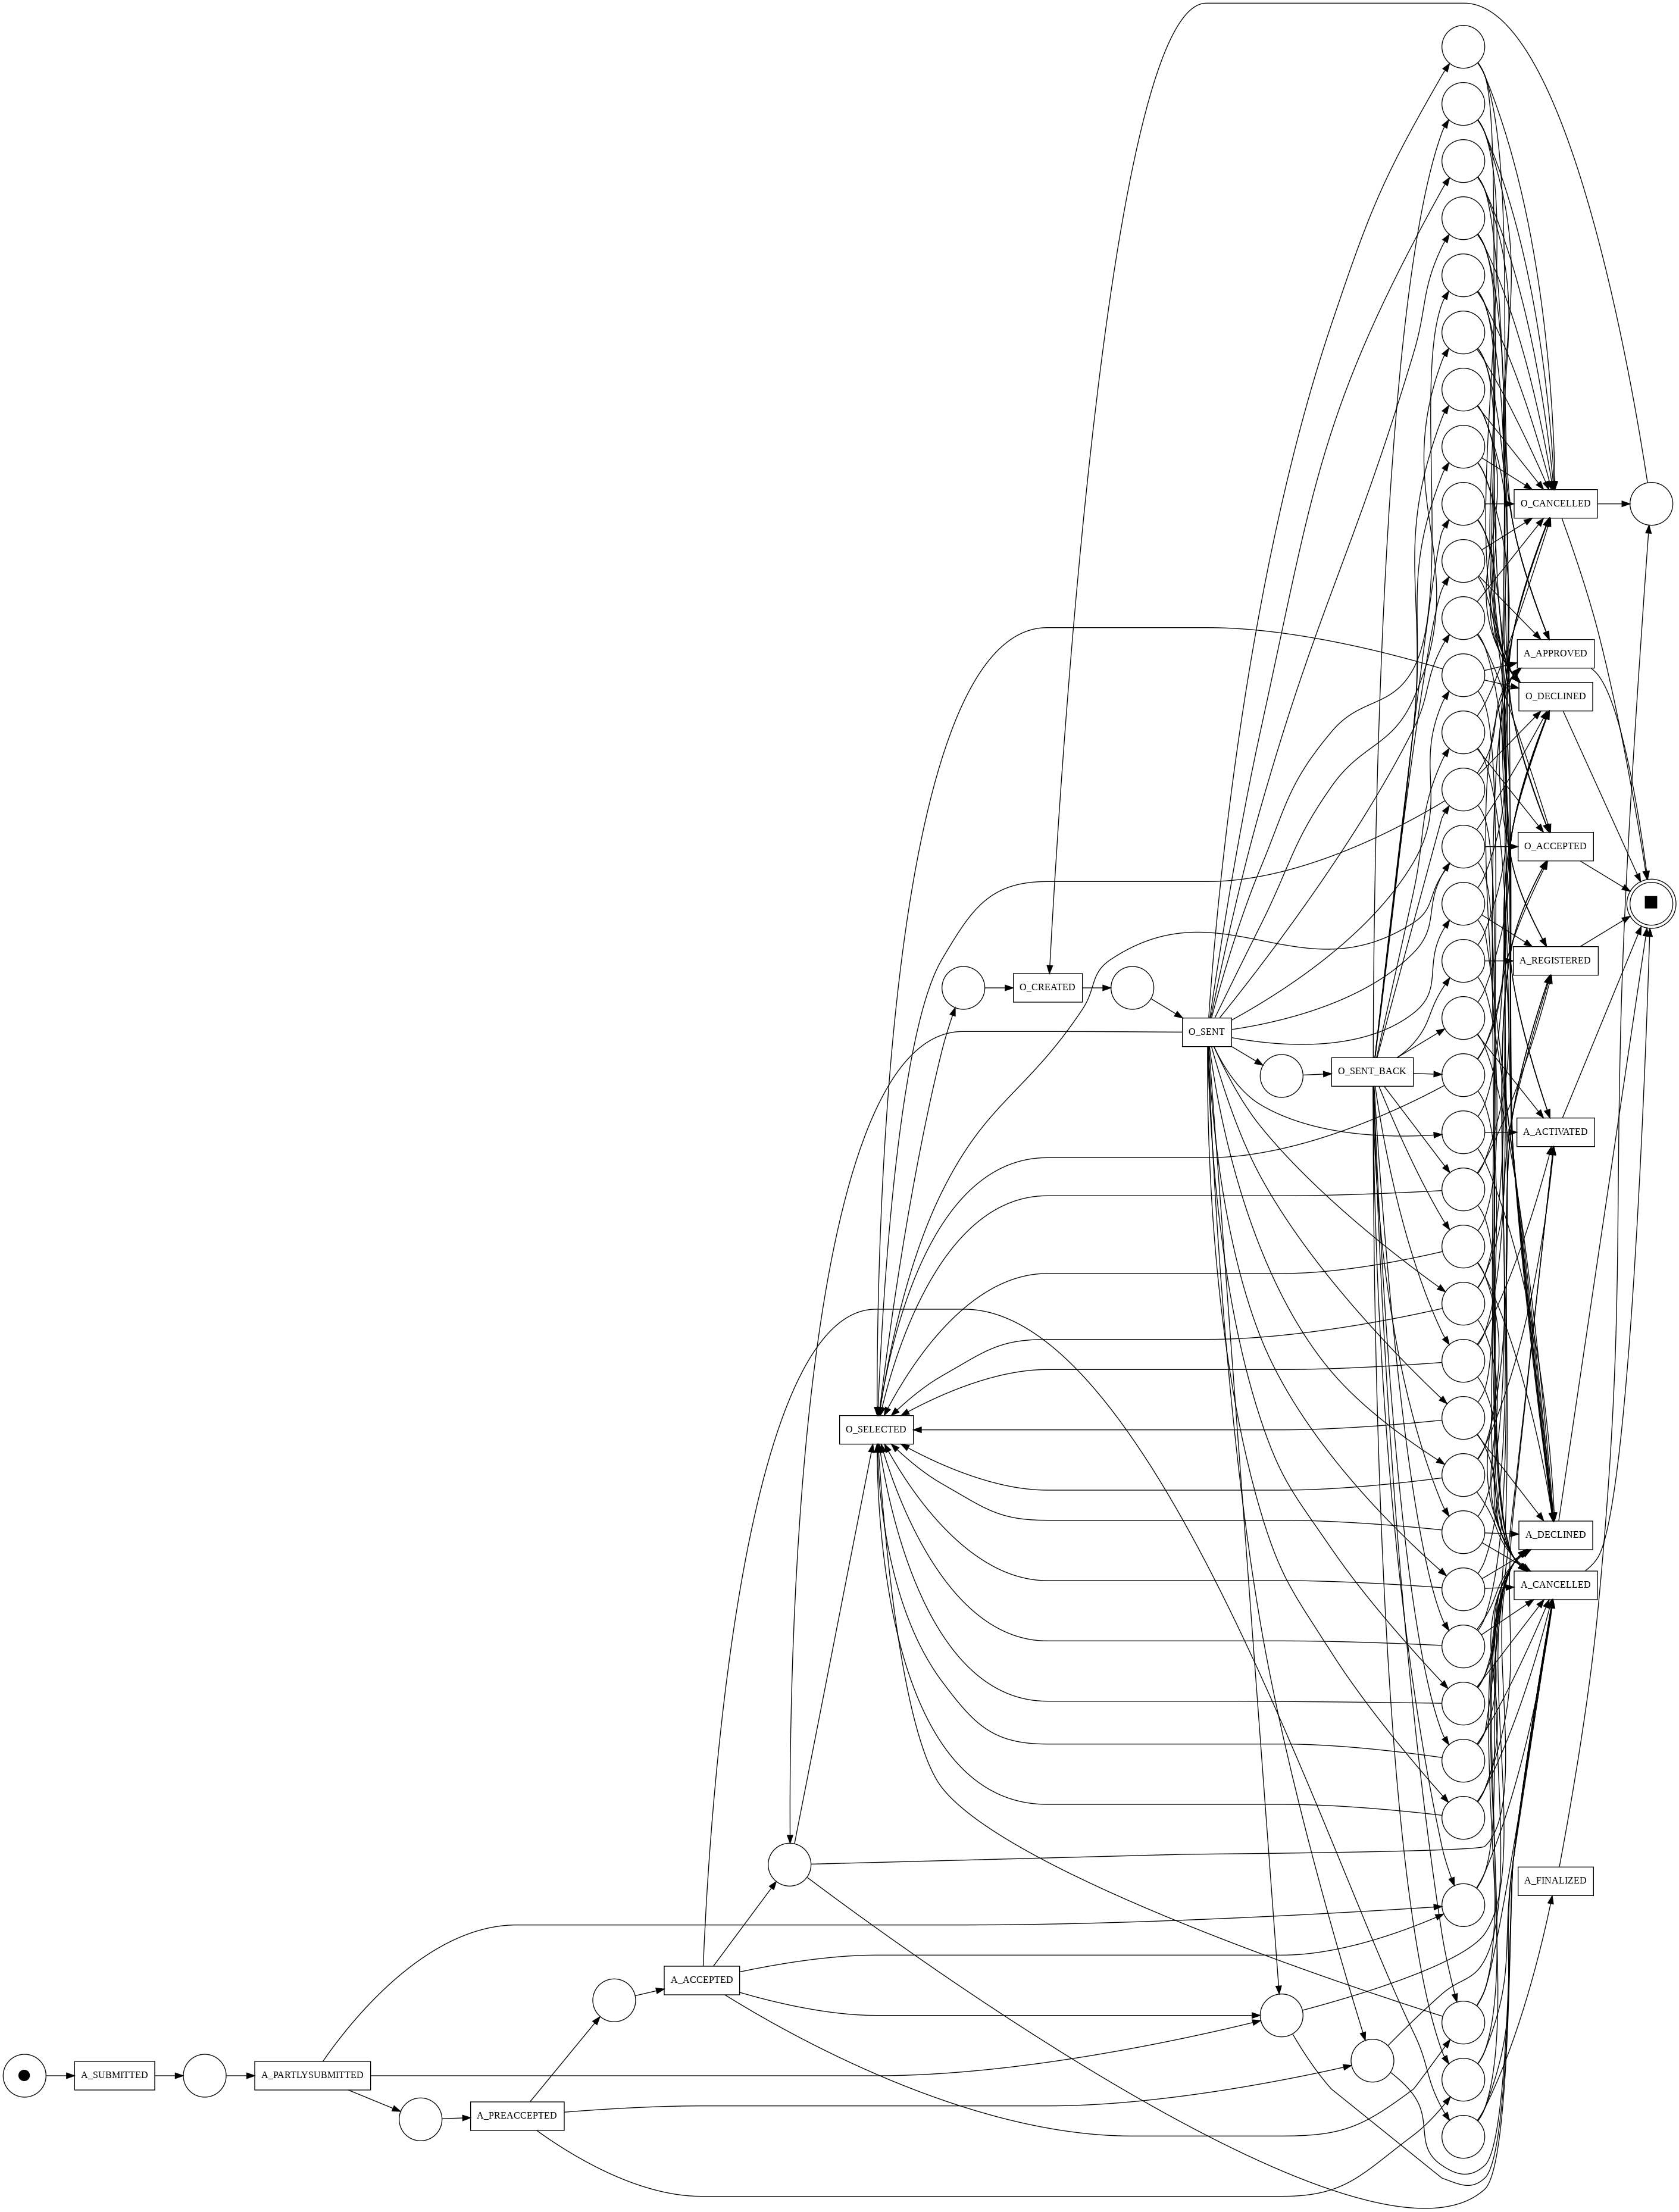

In [20]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_dis = new_df2.copy()

# Filter out all activities that start with "W_"
df_dis = df_dis[~df_dis['activity'].str.startswith("W_")]

# Format DataFrame for pm4py compatibility
formatted_df_dis = pm4py.format_dataframe(
    df_dis,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp",
)

# Convert the formatted DataFrame to an event log
new_event_log_df_dis = pm4py.convert_to_event_log(formatted_df_dis)

# Discover the Petri net using the Alpha Miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net_a, im_a, fm_a = alpha_miner.apply(new_event_log_df_dis)

# Visualize the discovered Petri net
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Apply visualization to the Petri net
alpha = pn_visualizer.apply(net_a, im_a, fm_a)
pn_visualizer.view(alpha)

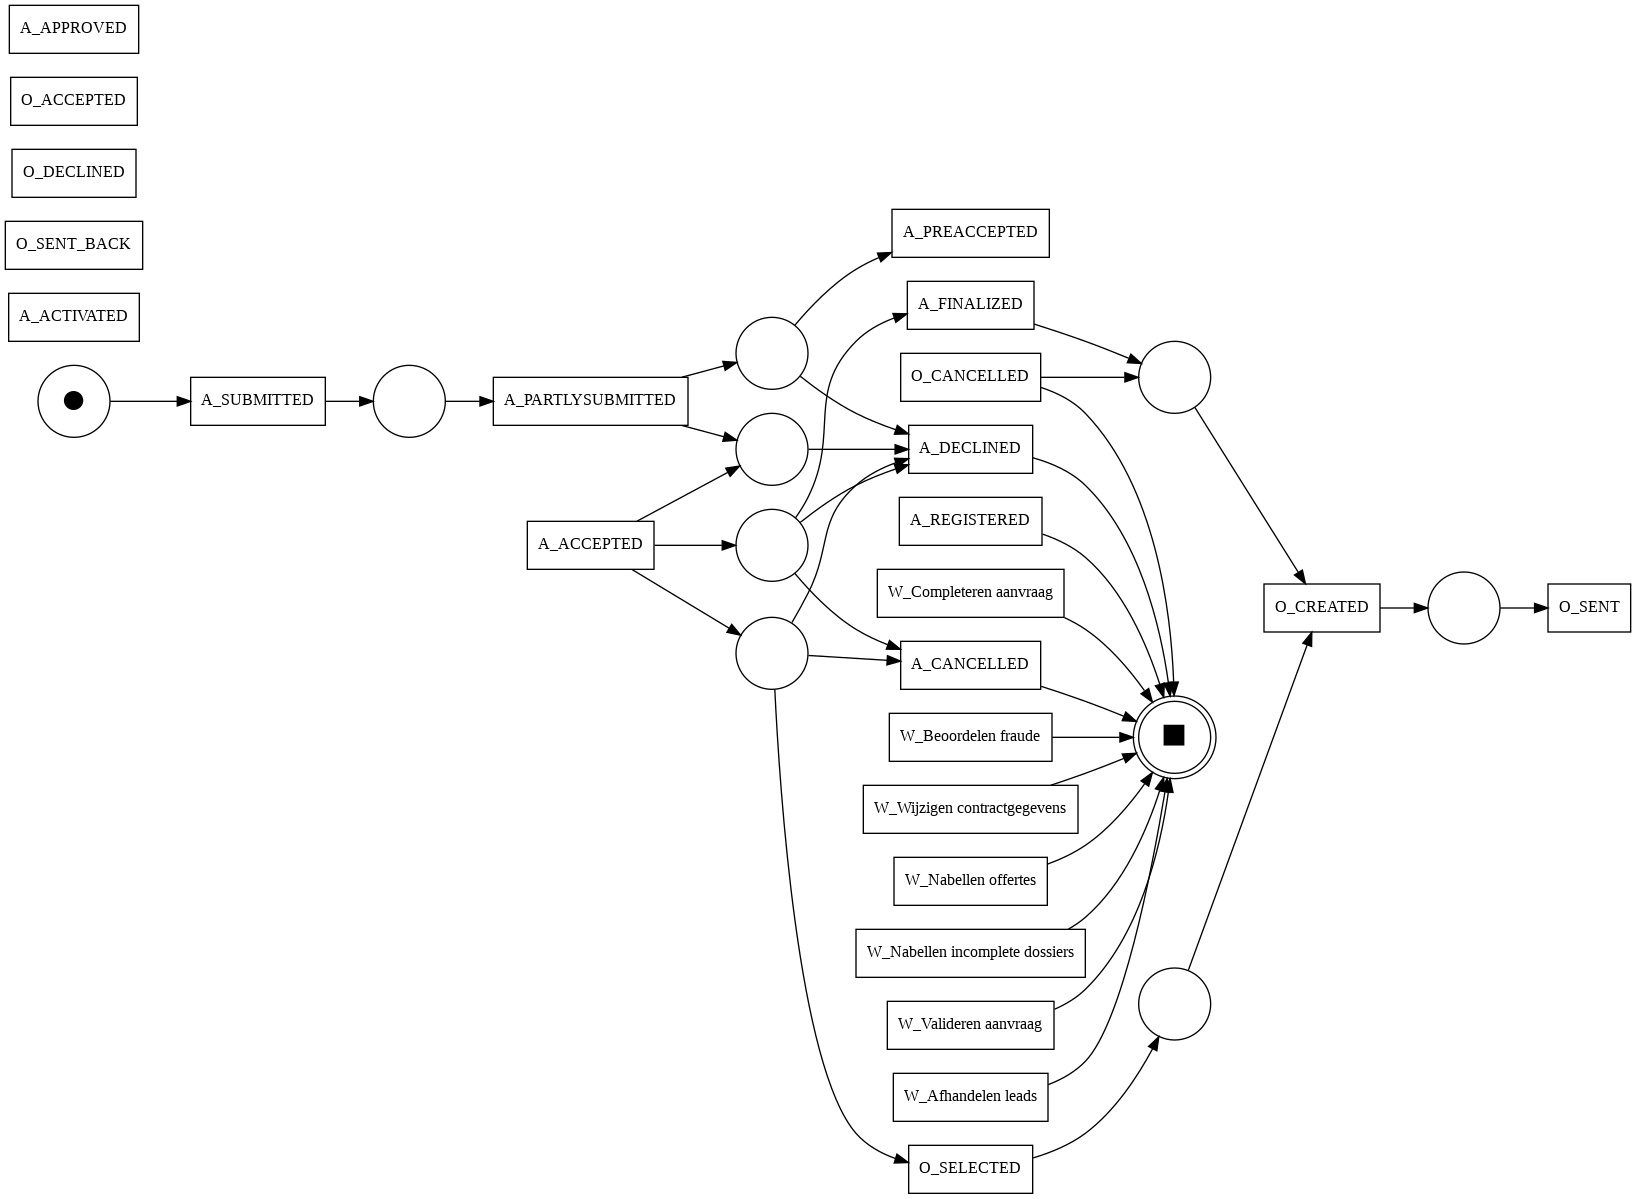

In [21]:
# Explore the whole process including W_ activities
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_all = new_df2.copy()

# Format DataFrame for pm4py compatibility
formatted_df_all = pm4py.format_dataframe(
    df_all,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp",
)

# Convert the formatted DataFrame to an event log
new_event_log_df_all = pm4py.convert_to_event_log(formatted_df_all)

# Import Aplha
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# Discover the Petri net using the Alpha Miner algorithm
net_all, im_all, fm_all = alpha_miner.apply(new_event_log_df_all)

# Visualize the discovered Petri net
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Apply visualization to the Petri net
alpha_all = pn_visualizer.apply(net_all, im_all, fm_all)
pn_visualizer.view(alpha_all)

In [22]:
# Find the fitness measure of Alpha Miner in all cases
fitness_all = pm4py.fitness_token_based_replay(new_event_log_df_all, net_all, im_all, fm_all)
print("Fitness Alpha Miner in all cases =",fitness_all)

replaying log with TBR, completed traces ::   0%|          | 0/4070 [00:00<?, ?it/s]

Fitness Alpha Miner in all cases = {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6551183808262492, 'log_fitness': 0.5570477844775463, 'percentage_of_fitting_traces': 0.0}


<ipython-input-23-5496b9127052>:22: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. this method will be removed in a future release.
  net_ap, im_ap, fm_ap = pm4py.discover_petri_net_alpha_plus(df_ap)


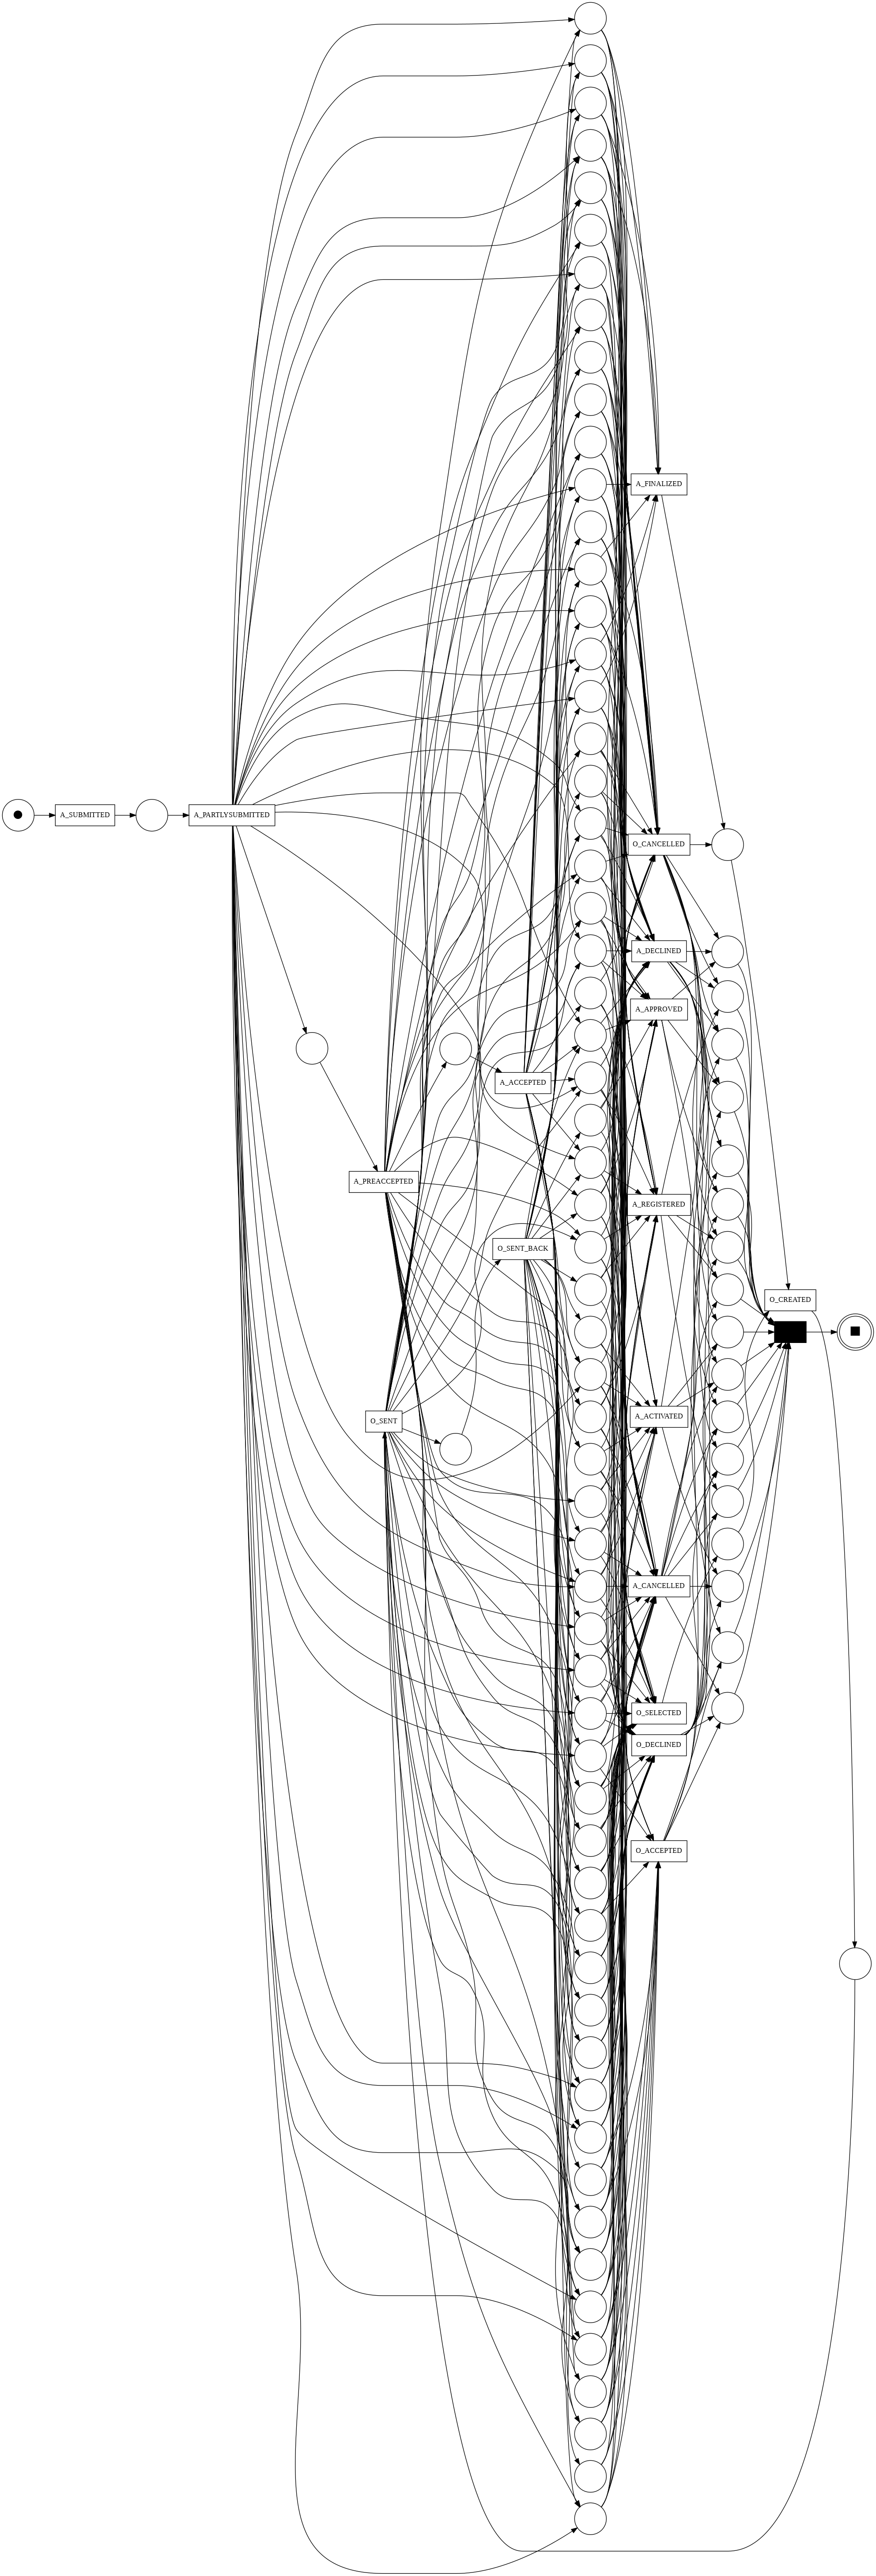

In [23]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_ap = new_df2.copy()

# Filter out all activities that start with "W_"
df_ap = df_ap[~df_ap['activity'].str.startswith("W_")]

# Format DataFrame for pm4py compatibility
formatted_df_ap = pm4py.format_dataframe(
    df_ap,
    case_id="case_id",
    activity_key="activity",
    timestamp_key="timestamp",
)

# Convert the formatted DataFrame to an event log
new_event_log_df_ap = pm4py.convert_to_event_log(formatted_df_ap)

#!! <ipython-input-23-7ecdf3f8fccd>:17: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0
#!! and will be removed in 3.0.0. this method will be removed in a future release.

#Discover the petrinet with Alpha Plus
net_ap, im_ap, fm_ap = pm4py.discover_petri_net_alpha_plus(df_ap)

# Visualize the discovered Petri net
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Apply visualization to the Petri net
alpha_plus = pn_visualizer.apply(net_ap, im_ap, fm_ap)
pn_visualizer.view(alpha_plus)

In [24]:
#Find the fitness measure of Alpha Plus
fitness_aplus = pm4py.fitness_token_based_replay(new_event_log_df_ap, net_ap, im_ap, fm_ap)
print("Fitness Alpha Plus =",fitness_aplus)

replaying log with TBR, completed traces ::   0%|          | 0/533 [00:00<?, ?it/s]

Fitness Alpha Plus = {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.7159984260819132, 'log_fitness': 0.7882329863518727, 'percentage_of_fitting_traces': 0.0}


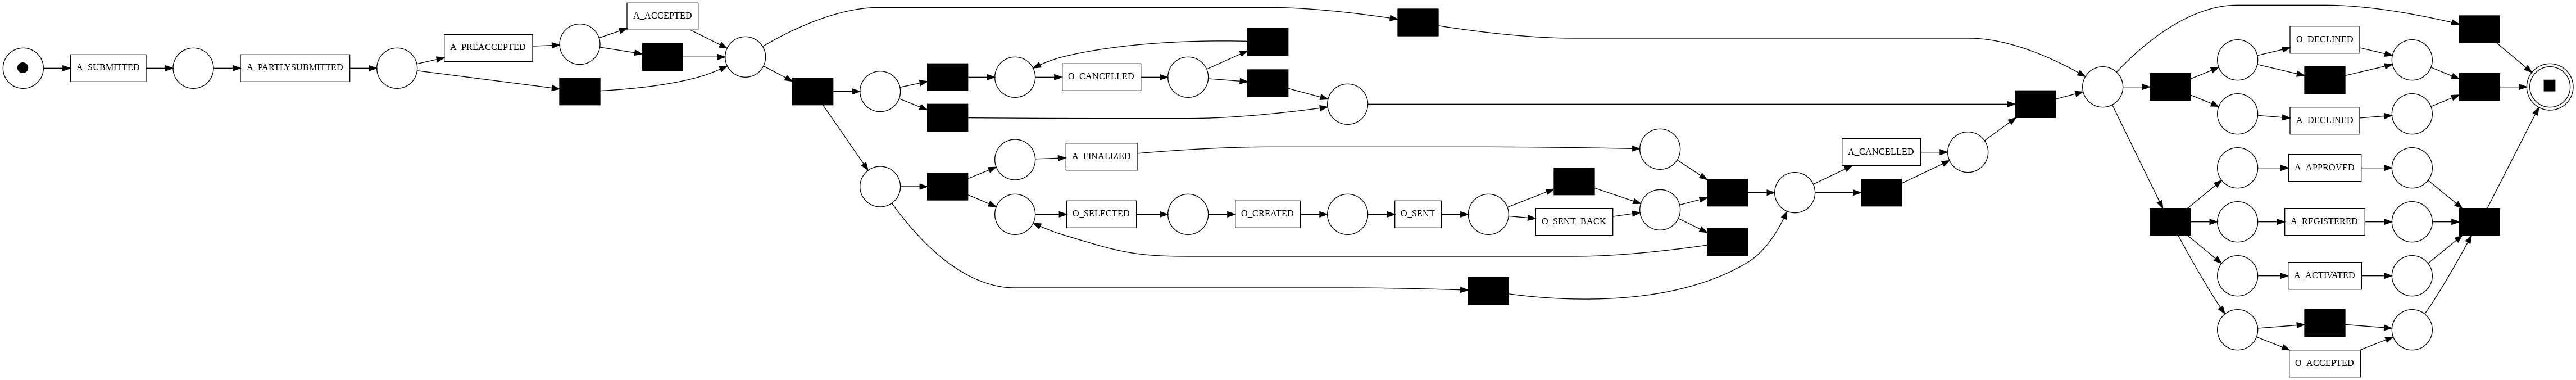

In [25]:
# Import Inductive & Converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.process_tree import converter as pt_converter

# Discover the Process Tree using the Inductive Miner algorithm
tree_induc = inductive_miner.apply(new_event_log_df_dis)

# Discover the Petri net using the Inductive Miner algorithm
net_i, im_i, fm_i = pt_converter.apply(tree_induc, variant=pt_converter.Variants.TO_PETRI_NET)

# Visualize the discovered Petri net using the Inductive Miner approach
induc = pn_visualizer.apply(net_i, im_i, fm_i)
pn_visualizer.view(induc)

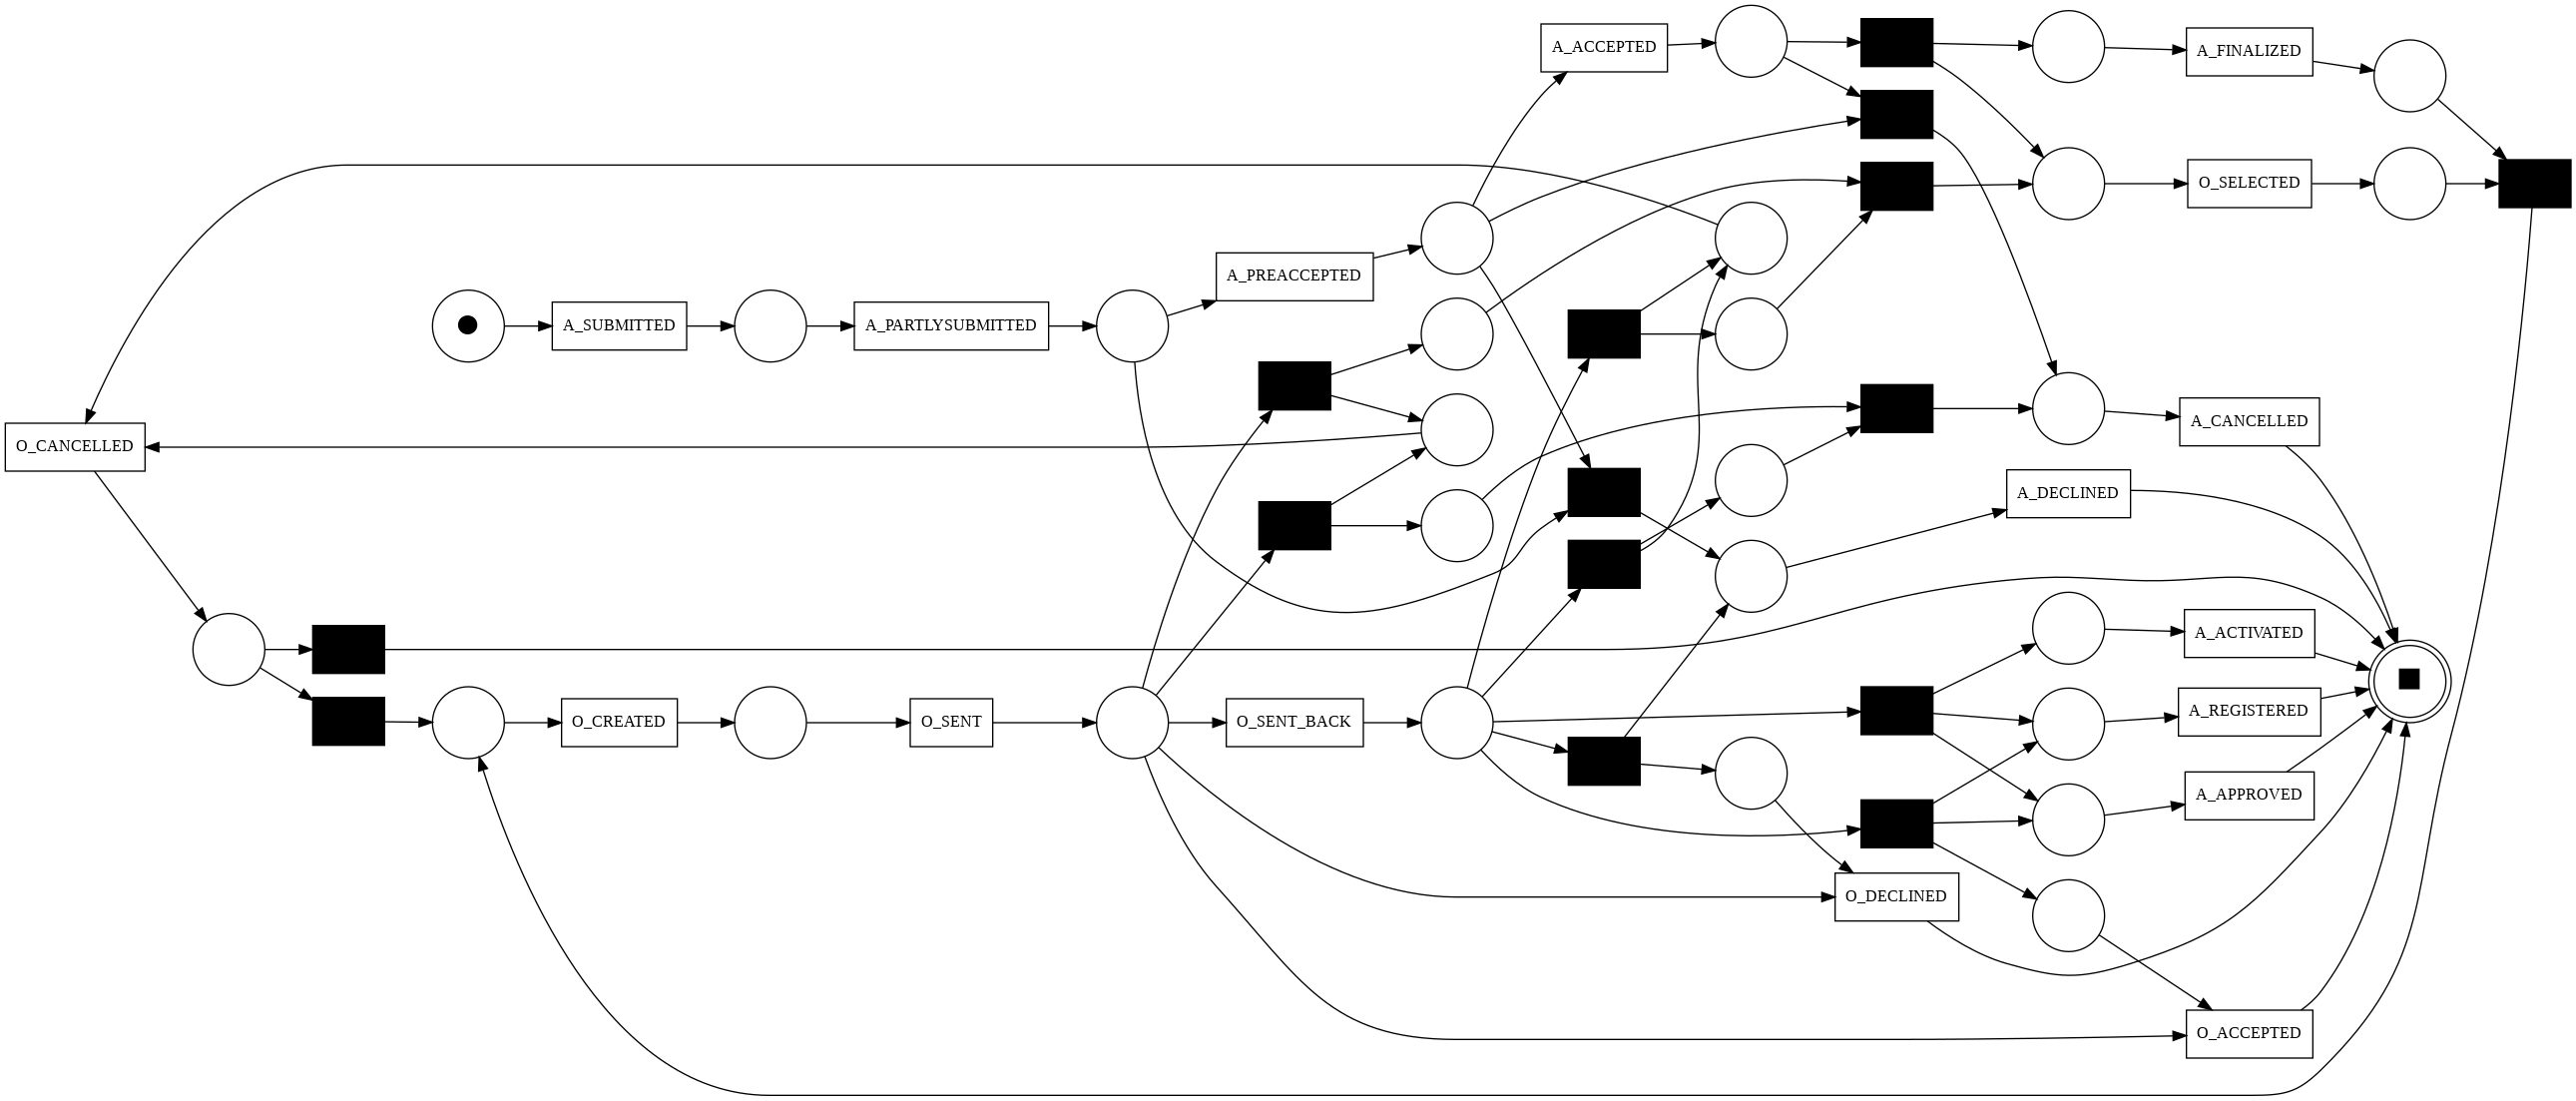

In [26]:
# Import Heuristic
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Discover the Petri net using the Heuristic Miner algorithm
net_h, im_h, fm_h = heuristics_miner.apply(new_event_log_df_dis)

# Visualize the discovered Petri net using the Heuristic Miner approach
heur = pn_visualizer.apply(net_h, im_h, fm_h)
pn_visualizer.view(heur)

In [27]:
# To calculate replay fitness between an event log and a Petri net model
#using the token-based replay method, use the code on the right side.
#The resulting fitness value ranges from 0 to 1.

fitness_a_t = pm4py.fitness_token_based_replay(new_event_log_df_dis, net_a, im_a, fm_a)
fitness_i_t = pm4py.fitness_token_based_replay(event_log, net_i, im_i, fm_i)
fitness_h_t = pm4py.fitness_token_based_replay(event_log, net_h, im_h, fm_h)

print("Fitness Alpha Miner in token-based replay =",fitness_a_t)
print("Fitness Inductive Miner in token-based replay =",fitness_i_t)
print("Fitness Heuristic Miner in token-based replay =",fitness_h_t)

replaying log with TBR, completed traces ::   0%|          | 0/533 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4366 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/4366 [00:00<?, ?it/s]

Fitness Alpha Miner in token-based replay = {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6052800556468559, 'log_fitness': 0.6486253051183399, 'percentage_of_fitting_traces': 0.0}
Fitness Inductive Miner in token-based replay = {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
Fitness Heuristic Miner in token-based replay = {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8051070482318984, 'log_fitness': 0.8381995537599435, 'percentage_of_fitting_traces': 0.0}


#Trying the following cell code raise the
#Exception: trying to apply alignments on a Petri net that is not a easy sound net!!

To calculate replay fitness between an event log and a Petri net model using the alignmentsmethod. The resulting fitness value ranges from 0 to 1.

fitness_a_a = pm4py.fitness_alignments(new_event_log_df_dis, net_a, im_a, fm_a)

fitness_i_a = pm4py.fitness_alignments(event_log, net_i, im_i, fm_i)

fitness_h_a = pm4py.fitness_alignments(event_log, net_h, im_h, fm_h)

print("Fitness Alpha Miner in alignments =",fitness_a_a)

print("Fitness Inductive Miner in alignments =",fitness_i_a)

print("Fitness Heuristic Miner in alignments =",fitness_h_a)

In [28]:
# Checking the soundness of the discovered Petri Nets
from pm4py.objects.petri_net.utils import check_soundness

print( "Alpha Miner Petri Net is sound?", check_soundness.check_easy_soundness_net_in_fin_marking(net_a, im_a, fm_a) )
print( "Inductive Miner Petri Net is sound?", check_soundness.check_easy_soundness_net_in_fin_marking(net_i, im_i, fm_i) )
print( "Heuristic Miner Petri Net is sound?", check_soundness.check_easy_soundness_net_in_fin_marking(net_h, im_h, fm_h) )

Alpha Miner Petri Net is sound? False
Inductive Miner Petri Net is sound? True
Heuristic Miner Petri Net is sound? False


In [29]:
# To calculate the precision between an event log and a Petri net model,
#using the ETConformance method, the code on the right side can be used.
#The resulting value is a number between 0 and 1.

prec_a_t = pm4py.precision_token_based_replay(new_event_log_df_dis, net_a, im_a, fm_a)
prec_i_t = pm4py.precision_token_based_replay(new_event_log_df_dis, net_a, im_a, fm_a)
prec_h_t = pm4py.precision_token_based_replay(new_event_log_df_dis, net_a, im_a, fm_a)

print("Precision Alpha Miner in token-based replay =",prec_a_t)
print("Precision Inductive Miner in token-based replay =",prec_i_t)
print("Precision Heuristic Miner in token-based replay =",prec_h_t)

replaying log with TBR, completed traces ::   0%|          | 0/1518 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1518 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/1518 [00:00<?, ?it/s]

Precision Alpha Miner in token-based replay = 1.0
Precision Inductive Miner in token-based replay = 1.0
Precision Heuristic Miner in token-based replay = 1.0


#Trying the following cell code raise the
#Exception: trying to apply alignments on a Petri net that is not a easy sound net!!

To calculate the precision between an event log and a Petri net model,
using the Align-ETConformance method.The resulting value is a number between 0 and 1.

prec_a_a = pm4py.precision_alignments(new_event_log_df_dis, net_a, im_a, fm_a)

prec_i_a = pm4py.precision_alignments(new_event_log_df_dis, net_i, im_i, fm_i)

prec_h_a = pm4py.precision_alignments(new_event_log_df_dis, net_h, im_h, fm_h)

print("Precision Alpha Miner in alignments =",prec_a_a)

print("Precision Inductive Miner in alignments =",prec_i_a)

print("Precision Heuristic Miner in alignments =",prec_h_a)

In [30]:
# Calculate only for the sound Inductive Miner Petri Net
#the replay fitness using the alignmentsmethod and
#the precision using the Align-ETConformance method
#The resulting values is a number between 0 and 1.

fitness_i_a = pm4py.fitness_alignments(event_log, net_i, im_i, fm_i)
print("Fitness Inductive Miner in alignments =",fitness_i_a)

prec_i_a = pm4py.precision_alignments(new_event_log_df_dis, net_i, im_i, fm_i)
print("Precision Inductive Miner in alignments =",prec_i_a)

aligning log, completed variants ::   0%|          | 0/4366 [00:00<?, ?it/s]

Fitness Inductive Miner in alignments = {'percFitTraces': 26.201574081149232, 'averageFitness': 0.5913882803138335, 'percentage_of_fitting_traces': 26.201574081149232, 'average_trace_fitness': 0.5913882803138335, 'log_fitness': 0.4100945693013638}


computing precision with alignments, completed variants ::   0%|          | 0/1518 [00:00<?, ?it/s]

Precision Inductive Miner in alignments = 0.45574382320970175


In [31]:
# Calculate the Simplicity
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

simp_a = simplicity_evaluator.apply(net_a)
simp_i = simplicity_evaluator.apply(net_i)
simp_h = simplicity_evaluator.apply(net_h)

print("Simplicity Alpha Miner =",simp_a)
print("Simplicity Inductive Miner =",simp_i)
print("Simplicity Heuristic Miner =",simp_h)

Simplicity Alpha Miner = 0.19402985074626863
Simplicity Inductive Miner = 0.6666666666666666
Simplicity Heuristic Miner = 0.5769230769230769


In [32]:
# Calculate the Generalization
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

gen_a = generalization_evaluator.apply(new_event_log_df_dis, net_a, im_a, fm_a)
gen_i = generalization_evaluator.apply(new_event_log_df_dis, net_i, im_i, fm_i)
gen_h = generalization_evaluator.apply(new_event_log_df_dis, net_h, im_h, fm_h)

print("Generalization Alpha Miner =",gen_a)
print("Generalization Inductive Miner =",gen_i)
print("Generalization Heuristic Miner =",gen_h)

replaying log with TBR, completed traces ::   0%|          | 0/533 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/533 [00:00<?, ?it/s]

replaying log with TBR, completed traces ::   0%|          | 0/533 [00:00<?, ?it/s]

Generalization Alpha Miner = 0.9835239309802355
Generalization Inductive Miner = 0.9683796731766868
Generalization Heuristic Miner = 0.8690383808727549
